https://www.kaggle.com/competitions/cisc-873-dm-f22-a1

# **MEMES**

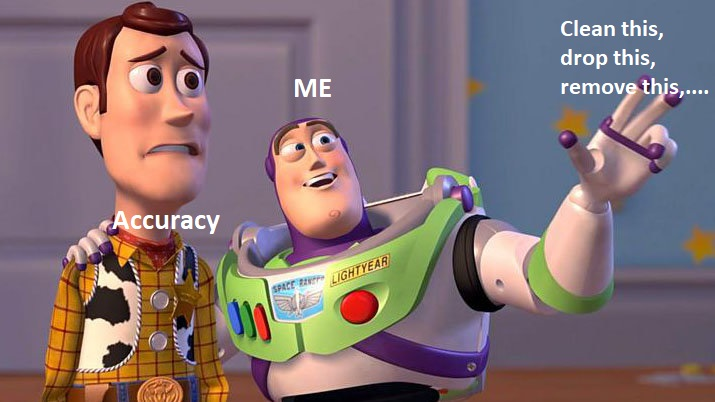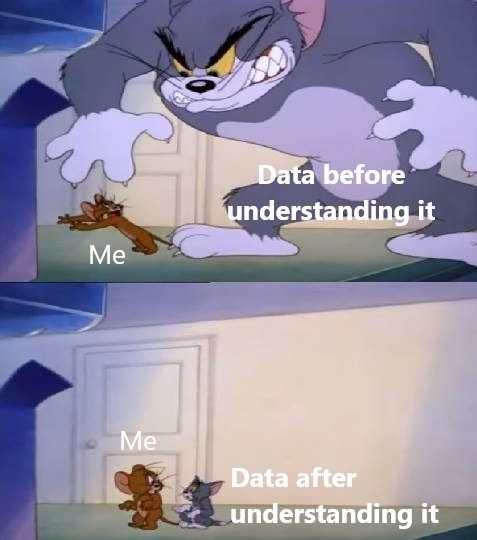

# **Problem Formulation**

**Problem:** We want to classify each product according to its rating from 1–5.We will classify each product according to some features and the appropriate model.

**Inputs:** 32 features

**Output:** product rating from 1-5

**Function required:** Classification & Prediction

**Challenges:** \
1- Cleaning up some information \
2- Cleaning tags and product_color columns.\
3- Select important features and drop the others (feature selection).\
4- Select appropriate hyperparameters in each algorithm.\
5- Use One Hot Encoder Instead of a Label Encoder but it is not working.

**What is the impact?**\
If the model predicts the rating very well this means the website will not wait to know what the product rating is, as the model will tell you the rating before producing a new product for cutemer, so the website's profit will be increased.

**What is the ideal solution?**\
The decision tree model is the proposed solution.

# **Trials**

## **Common Commands** in all models

**What is the experimental protocol used and how was it carried out?** \
1-Read Training and Testing Data \
2-Data Preprocessing \
3-Splitting data\
4-Built model

* I used the Cross Validation function.

**What preprocessing steps are used?**

1- Drop an unimportant features \
2- Clean some of features that need to clean by using.str.lower, .str.replace, and re.search\
3- Handeling NaN values\
4- A Lable Encoder to convert categorical data into numerical.

In [ ]:
#liberaries will be used during all models
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

In [ ]:
#connect to my drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Decision Tree**

### **Trial 0**

* In this trial, I will use 22 features.\
* I will do "Clean to product_variation_size_id" and "Clean to product_color" only.\
* I will use the Decision Tree model with defualt parameters.\
* In the previous trials, I tried to use Box plot and remove outliers, but the F1 score was very bad when I did that, and I removed raw that had a rating of 6, but this gave a bad F1 score.

**My thoughts and observations :** The f1 score would be between 0.70 and 0.73.

##### Read Training and Testing data

In [ ]:
#read all our traning data
df_tr = pd.read_csv ('/content/drive/MyDrive/Queens_Practical/Data_Mining/compt1/train_new.csv')
df_tr

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,8.00,7,EUR,10000,1,4.0,1670,0,0,0,0,"Summer,soildcolor,Plus Size,Tank,camisole,Tops...",yellow,M,50,Livraison standard,3,0,30,50,NaN,NaN,CN,keepahorse,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,577fb2b368116418674befd9,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,272
1,8.00,7,EUR,1000,0,4.0,843,1,1,0,0,"bathing suit,Plus Size,bikini set,sexy swimsui...",black,L,50,Livraison standard,3,0,37,50,NaN,NaN,CN,shanghaimingqidianqikejiyouxiangongsi,上海铭启电气科技有限公司,"91 % avis positifs (25,752 notes)",25752,4.256873,566a3ef17233ff2686443082,0,NaN,summer,2020-08,1515
2,6.00,34,EUR,100,0,4.0,10,0,0,0,0,"Summer,Vest,momshirt,Get,summer t-shirts,funny...",white,L,50,Livraison standard,2,0,41,50,NaN,NaN,CN,zhaodongmei,zhaodongmei,"83 % avis positifs (3,897 notes)",3897,3.928920,5aacd6c1ccf0c83e5a6f3de0,0,NaN,summer,2020-08,940
3,4.67,4,EUR,100,1,3.0,82,0,0,0,0,"Summer,Shorts,pants,Beach,Plus Size,beachpant,...",lakeblue,XS,5,Livraison standard,1,0,25,50,NaN,NaN,CN,pookie0331,pookie0331,"87 % avis positifs (7,497 notes)",7497,4.079365,583141fbfef4094e51453d9b,0,NaN,summer,2020-08,309
4,8.00,11,EUR,1000,0,4.0,127,0,0,0,0,"Summer,Floral print,women dresses,fashion dres...",apricot,S,50,Livraison standard,3,0,15,50,1.0,Quantité limitée !,CN,shitongyi12683626,shitongyi12683626,91 % avis positifs (173 notes),173,4.306358,5d3bc9f8e13a7e654424a4cb,0,NaN,summer,2020-08,226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,4.00,4,EUR,10000,0,4.0,2150,0,0,0,0,"corset top,Fashion,crop top,camisole,knittop,T...",red,S,50,Livraison standard,1,0,41,50,NaN,NaN,CN,fantastic_tune,fantastic_tune,"92 % avis positifs (230,951 notes)",230951,4.311066,53f2db3c104dae6bcae0c271,0,NaN,summer,2020-08,1381
1090,5.00,5,EUR,1000,0,5.0,377,1,0,1,0,"Blues,Summer,luggagesticker,Bicycle,cute,fresh...",NaN,H01,31,Livraison standard,2,0,35,50,NaN,NaN,CN,zzbllss,zzbllss,"(2,904 notes)",2904,4.422521,592968ba63950d682ca4b195,0,NaN,summer,2020-08,212
1091,9.00,48,EUR,1000,1,4.0,135,0,0,0,0,"Summer,Vest,Fashion,Tank,camisole,Halter,Beaut...",purple,M,50,Livraison standard,3,0,25,50,NaN,NaN,CN,OIUG 56465,oiug56465,"78 % avis positifs (6,632 notes)",6632,3.748794,5b6ec2f2838d931d2fbf7a28,0,NaN,summer,2020-08,163
1092,11.00,10,EUR,10000,1,4.0,1479,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,letter pri...",black,M,50,Livraison standard,2,0,45,50,1.0,Quantité limitée !,CN,yubenqiang,yubenqiang,"83 % avis positifs (5,816 notes)",5816,3.936382,58330d7def56284f7634e5e5,0,NaN,summer,2020-08,674


In [ ]:
#read all our testing data
df_test = pd.read_csv ('/content/drive/MyDrive/Queens_Practical/Data_Mining/compt1/test_new.csv')
df_test.head(5)

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,5.75,5,EUR,10,1,0,0,0,0,0,"Funny,letter print,Fashion,Shirt,Sleeve,Summer...",white,XS,5,Livraison standard,2,0,139,50,NaN,NaN,CN,liyang163,liyang163,33 % avis positifs (3 notes),3,2.333333,5e63469b2fdc774466e15dd5,0,NaN,summer,2020-08,937
1,7.00,7,EUR,5000,0,579,0,0,0,0,"Women Vest,Vest,Fashion,Women Blouse,long dres...",black,XS,50,Livraison standard,2,0,31,50,NaN,NaN,CN,singing the song,singingthesong,"86 % avis positifs (4,213 notes)",4213,4.058391,583547f417dc6224cb464117,0,NaN,summer,2020-08,270
2,5.00,16,EUR,1000,1,62,0,0,0,0,"hollowouttanktop,Tanktops for women,Plus Size,...",blue,XS,20,Livraison standard,2,0,41,50,NaN,NaN,CN,Surper boutique,surperboutique,"85 % avis positifs (10,501 notes)",10501,4.029235,57086fd7fa6bee434d0e5852,0,NaN,summer,2020-08,308
3,18.00,27,EUR,5000,1,1903,0,0,0,0,"men jeans,Shorts,Summer,Vintage,Denim,Men,casu...",blue,M,50,Livraison standard,5,0,42,50,NaN,NaN,CN,postonny,postonny,"86 % avis positifs (15,855 notes)",15855,4.052917,5a17b55d1f4d8c4f0b44b0ce,0,NaN,summer,2020-08,913
4,12.00,81,EUR,20000,0,1799,0,0,0,0,"Shorts,Lace,pants,Dress,Women Leggings,Hot pan...",white,M,50,Livraison standard,3,0,38,50,NaN,NaN,CN,fashionforgirls,guangzhouchanny,"88 % avis positifs (151,914 notes)",151914,4.127921,53aa664438d3046ee44a5024,0,NaN,summer,2020-08,403


#### Preprocessing

##### Drop unimportant data from traing and testing data

###### Traing data

In [ ]:
# Drop unimportant traing features
df_tr.drop(columns=['urgency_text','merchant_profile_picture','merchant_name','shipping_option_name','merchant_has_profile_picture','merchant_info_subtitle','merchant_rating_count'],inplace=True)

In [ ]:
#Drop features that have (unique or same) value
print(df_tr['currency_buyer'].unique())
print('-------------')
print(df_tr['theme'].unique())
print('-------------')
print(df_tr['crawl_month'].unique())
df_tr.drop(columns=['currency_buyer','theme','crawl_month'],inplace=True)

['EUR']
-------------
['summer']
-------------
['2020-08']


###### Testing data

In [ ]:
# Drop unimportant testing features
df_test.drop(columns=['urgency_text','merchant_profile_picture','merchant_name','shipping_option_name','merchant_has_profile_picture','merchant_info_subtitle','merchant_rating_count'],inplace=True)

In [ ]:
#Drop features that have (unique or same) value
print(df_test['currency_buyer'].unique())
print('-------------')
print(df_test['theme'].unique())
print('-------------')
print(df_test['crawl_month'].unique())
df_test.drop(columns=['currency_buyer','theme','crawl_month'],inplace=True)

['EUR']
-------------
['summer']
-------------
['2020-08']


##### Clean product_variation_size_id

###### Taining data

In [ ]:
print(df_tr['product_variation_size_id'].unique())    # How many unique value

['M' 'L' 'XS' 'S' 'XL' '26(Waist 72cm 28inch)' 'S.' 'S(bust 88cm)' 'XXS'
 's' '29' nan 'choose a size' 'XXXS' 'Base Coat' 'Size M' 'XXL' 'M.' 'XS.'
 '100 x 100cm(39.3 x 39.3inch)' '2pcs' '4XL' '1' '25-S' 'Size-XXS'
 '5PAIRS' '35' 'Pack of 1' 'Size S' 'Size-S' '6XL' '25' 'S/M(child)' '60'
 'Size-XS' 'S (waist58-62cm)' 'SIZE XXS' '10 ml' 'X   L' 'Women Size 36'
 '04-3XL' 'Size -XXS' '1 pc.' 'Floating Chair for Kid' 'S Pink' '34'
 'US-S' 'Size XXS' 'pants-S' 'XXXXL' 'SIZE-XXS' 'SIZE XS' '1pc' 'Size S.'
 '100 cm' 'S..' 'Round' '4-5 Years' '5' '33' '30 cm' '2' 'XXXXXL'
 '20PCS-10PAIRS' '2XL' 'Size-5XL' 'Size4XL' 'One Size' 'size S' 'Size/S'
 'B' 'SizeL' '20pcs' '1 PC - XL' 'Suit-S' 'Base & Top & Matte Top Coat'
 'Baby Float Boat' '1m by 3m' 'SIZE S' 'White' '40 cm' '5XL' '10pcs' 'H01']


In [ ]:
#convert all leters to small leters and remove any special char
df_tr['product_variation_size_id']=df_tr['product_variation_size_id'].str.lower() #Convert all leters to small leters
df_tr['product_variation_size_id']=df_tr['product_variation_size_id'].str.replace(r"\([^()]*\)", "")# Remove any parentheses and their contents
df_tr['product_variation_size_id']=df_tr['product_variation_size_id'].str.replace(r"[.\-/\&]", "")# Rmove any dot - \ or &

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [ ]:
#Remove any unimportant characters, numbers, and spaces
prod_size =df_tr['product_variation_size_id']
final_list=[]
for val in prod_size:
    # Search about any cell contain (number(0-9) followed by any number(0-...) of x and ended by (l or s) | any number of x followed by s or l | m | s followed bt space )
    # the result will be None if cell does not contain the condition
    # the result will be any number if cell contain the condition
    res_val=re.search('[0-9]x*l$|x*l$|x*s$|[0-9]x*s$|m|s\s',str(val))
    if res_val!=None:# The previous condition will be entered into the if statement if a cell achieves the condition.
        fin='' # variable to contain the result of each cell
        matchstr=res_val.start()  #matchstr contains the start index of res_val
        matchend=res_val.end()  #matchend contains the end index of res_val
        for strw in range(matchstr,matchend):  # this for loop from start index to end index that contain the condition like xxxl , m , xs, ...
            fin+=val[strw] # Collect letters and put them in fin
        final_list.append(fin)  # put fin after for loop in final_list list
    else:
        final_list.append(np.nan) # if cell does not contain previous condition so will put nan value in this cell

df_tr['product_variation_size_id']=final_list # assign final_list values to main dataframe
df_tr['product_variation_size_id']=df_tr['product_variation_size_id'].str.replace(r"\s", "") # Remove any space exist

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: The default value of regex will change from True to False in a future version.


In [ ]:
#convert any number before the letter l or s to number of xs
prod_size =df_tr['product_variation_size_id']
final_list=[]
for val in prod_size:
    # Search about any cell start with number(0-9)
    # the result will be None if cell does not contain the condition
    # the result will be any number if cell contain the condition
    res_val=re.search('^[0-9]',str(val))
    if res_val!=None: # if cell contain previous condition so will enter to if statement
        num=val[0] # put the number exist in cell in num variable
        fin='' # variable to contain the result of each cell
        for count in range(int(num)):
            fin+='x' # will convert any number to number of xs
        # after finish for loop anf put the value in fin variable 
        # I select the last letter in cell and then append it to fin to get the final value
        fin+=val[-1]
        final_list.append(fin)
    else: # if cell does not contain previous condition so it will put the same value that mean this cell contain right value
        final_list.append(val) # assign final_list values to main dataframe
df_tr['product_variation_size_id']=final_list

In [ ]:
#print product_variation_size_id shape and unique value after cleaning
print(df_tr['product_variation_size_id'].shape)
print(df_tr['product_variation_size_id'].unique())

(1094,)
['m' 'l' 'xs' 's' 'xl' nan 'xxs' 'xxxs' 'xxl' 'xxxxl' 'xxxxxs' 'xxxxxxl'
 'xxxl' 'xxxxxl']


###### Testing data

In [ ]:
print(df_test['product_variation_size_id'].unique())    # How many unique value

['XS' 'M' 'XXS' 'S' 'L' 'S(Pink & Black)' 'S(bust 88cm)' 'SizeL'
 'SIZE-XXS' 'XL' '1' '32/L' 'daughter 24M' 'XXXL' '5XL' '4' 'XS.' '1 pc.'
 '4XL' 'Size S' '2XL' 'S.' 's' '3XL' '80 X 200 CM' 'EU 35' '34' 'XXXXL'
 'XXL' '100pcs' 'SIZE XS' 'first  generation' '2pcs' 'Size--S' 'SIZE-4XL'
 'L.' 'Suit-S' 'Women Size 37' 'S Diameter 30cm' 'XXXS' 'Size-L' 'Size S.'
 'AU plug Low quality' '3 layered anklet' '17' 'size S' 'US 6.5 (EU 37)'
 'US5.5-EU35' 'EU39(US8)' nan '36' '33' 'One Size']


In [ ]:
# and 
df_test['product_variation_size_id']=df_test['product_variation_size_id'].str.lower() #Convert all leters to small leters
df_test['product_variation_size_id']=df_test['product_variation_size_id'].str.replace(r"\([^()]*\)", "") # Remove any parentheses and their contents
df_test['product_variation_size_id']=df_test['product_variation_size_id'].str.replace(r"[.\-/\&]", "") # Rmove any dot - \ or &

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [ ]:
#Remove any unimportant characters, numbers, and spaces
prod_size =df_test['product_variation_size_id']
final_list=[]
for val in prod_size:
    # Search about any cell contain (number(0-9) followed by any number(0-...) of x and ended by (l or s) | any number of x followed by s or l | m | s followed bt space )
    # the result will be None if cell does not contain the condition
    # the result will be any number if cell contain the condition
    res_val=re.search('[0-9]x*l$|x*l$|x*s$|[0-9]x*s$|m|s\s',str(val)) 
    if res_val!=None:   # The previous condition will be entered into the if statement if a cell achieves the condition.
        fin='' # variable to contain the result of each cell
        matchstr=res_val.start() #matchstr contains the start index of res_val
        matchend=res_val.end()  #matchend contains the end index of res_val
        for strw in range(matchstr,matchend): # this for loop from start index to end index that contain the condition like xxxl , m , xs, ...
            fin+=val[strw] # Collect letters and put them in fin
        final_list.append(fin) # put fin after for loop in final_list list
    else: # if cell does not contain previous condition so will put nan value in this cell
        final_list.append(np.nan) 

df_test['product_variation_size_id']=final_list # assign final_list values to main dataframe
df_test['product_variation_size_id']=df_test['product_variation_size_id'].str.replace(r"\s", "") # Remove any space exist


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: The default value of regex will change from True to False in a future version.


In [ ]:
#convert any number before the letter l or s to number of xs
prod_size =df_test['product_variation_size_id']
final_list=[]
for val in prod_size:
    # Search about any cell start with number(0-9)
    # the result will be None if cell does not contain the condition
    # the result will be any number if cell contain the condition
    res_val=re.search('^[0-9]',str(val))
    if res_val!=None: # if cell contain previous condition so will enter to if statement
        num=val[0] # put the number exist in cell in num variable
        fin='' # variable to contain the result of each cell
        for count in range(int(num)):
            fin+='x' # will convert any number to number of xs
        # after finish for loop anf put the value in fin variable 
        # I select the last letter in cell and then append it to fin to get the final value
        fin+=val[-1]
        final_list.append(fin)
    else:# if cell does not contain previous condition so it will put the same value that mean this cell contain right value
        final_list.append(val)
df_test['product_variation_size_id']=final_list # assign final_list values to main dataframe

In [ ]:
#print product_variation_size_id shape and unique value after cleaning
print(df_test['product_variation_size_id'].shape)
print(df_test['product_variation_size_id'].unique())

(479,)
['xs' 'm' 'xxs' 's' 'l' 'xl' nan 'xxl' 'xxxl' 'xxxxxl' 'xxxxl' 'xxxs']


##### Clean product_color

###### Taining data

In [ ]:
print(df_tr['product_color'].unique().shape)   # How many unique value

(88,)


In [ ]:
df_tr['product_color']=df_tr['product_color'].str.lower() #Convert all leters to small leters
df_tr['product_color']=df_tr['product_color'].str.replace(r"\([^()]*\)", "") # Remove any parentheses and their contents
df_tr['product_color']=df_tr['product_color'].str.replace(r"[.\-/\&]", "") # Rmove any dot - \ or &

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
print(df_tr['product_color'].shape) # print product_color shape
print(df_tr['product_color'].unique().shape)
print(df_tr['product_color'].unique()) # How many unique value

(1094,)
(83,)
['yellow' 'black' 'white' 'lakeblue' 'apricot' 'brown' 'winered' 'blue'
 'red' 'navyblue' 'green' 'khaki' 'white  green' 'multicolor' 'lightpink'
 'pink' 'armygreen' 'lightblue' nan 'coffee' 'grey' 'skyblue'
 'watermelonred' 'pink  black' 'whitefloral' 'purple' 'navy' 'pink  white'
 'rosered' 'orange' 'mintgreen' 'leopardprint' 'gray' 'navy blue' 'star'
 'rose' 'lightyellow' 'camouflage' 'black  yellow' 'whitestripe'
 'navyblue  white' 'black  blue' 'lightred' 'violet' 'gold' 'black  green'
 'white  black' 'burgundy' 'black  white' 'lightgrey' 'coolblack'
 'lightgreen' 'beige' 'darkblue' 'darkgreen' 'silver' 'wine red'
 'army green' 'pink  blue' 'rainbow' 'claret' 'floral' 'brown  yellow'
 'light green' 'blue  pink' 'dustypink' 'camel' 'orangered' 'rosegold'
 'ivory' 'fluorescentgreen' 'winered  yellow' 'offwhite' 'lightgray'
 'wine' 'army' 'applegreen' 'nude' 'pink  grey' 'rose red' 'denimblue'
 'blackwhite' 'leopard']


###### Testing data

In [ ]:
print(df_test['product_color'].unique())   # How many unique value

['white' 'black' 'blue' 'yellow' 'winered' 'navyblue' 'gray' 'grey' nan
 'green' 'pink' 'armygreen' 'red' 'black & green' 'lightblue'
 'pink & blue' 'orange' 'rosered' 'purple' 'watermelonred' 'coralred'
 'apricot' 'multicolor' 'tan' 'orange & camouflage' 'white & green'
 'army green' 'brown' 'silver' 'offblack' 'rose' 'jasper' 'beige' 'Pink'
 'floral' 'lightyellow' 'white & red' 'red & blue' 'khaki' 'camel'
 'leopard' 'camouflage' 'greysnakeskinprint' 'fluorescentgreen' 'coffee'
 'lightpurple' 'black & stripe' 'lightgreen' 'darkblue' 'navy' 'wine'
 'lightkhaki' 'pink & grey' 'prussianblue' 'skyblue' 'gray & white'
 'orange-red']


In [ ]:
#convert all leters to small leters and remove any special char
df_test['product_color']=df_test['product_color'].str.lower() #Convert all leters to small leters
df_test['product_color']=df_test['product_color'].str.replace(r"\([^()]*\)", "") # Remove any parentheses and their contents
df_test['product_color']=df_test['product_color'].str.replace(r"[.\-/\&]", "") # Rmove any dot - \ or &

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [ ]:
#print product_color shape and unique value after cleaning
print(df_test['product_color'].shape)
print(df_test['product_color'].unique())

(479,)
['white' 'black' 'blue' 'yellow' 'winered' 'navyblue' 'gray' 'grey' nan
 'green' 'pink' 'armygreen' 'red' 'black  green' 'lightblue' 'pink  blue'
 'orange' 'rosered' 'purple' 'watermelonred' 'coralred' 'apricot'
 'multicolor' 'tan' 'orange  camouflage' 'white  green' 'army green'
 'brown' 'silver' 'offblack' 'rose' 'jasper' 'beige' 'floral'
 'lightyellow' 'white  red' 'red  blue' 'khaki' 'camel' 'leopard'
 'camouflage' 'greysnakeskinprint' 'fluorescentgreen' 'coffee'
 'lightpurple' 'black  stripe' 'lightgreen' 'darkblue' 'navy' 'wine'
 'lightkhaki' 'pink  grey' 'prussianblue' 'skyblue' 'gray  white'
 'orangered']


##### Handeling NaN values

###### Taining data

In [ ]:
# Check number of missing data exist
df_tr.isnull().sum()

price                            0
retail_price                     0
units_sold                       0
uses_ad_boosts                   0
rating                           0
rating_count                     0
badges_count                     0
badge_local_product              0
badge_product_quality            0
badge_fast_shipping              0
tags                             0
product_color                   29
product_variation_size_id       38
product_variation_inventory      0
shipping_option_price            0
shipping_is_express              0
countries_shipped_to             0
inventory_total                  0
has_urgency_banner             745
origin_country                  12
merchant_title                   0
merchant_rating                  0
merchant_id                      0
id                               0
dtype: int64

In [ ]:
#fill Nan with appropriate values
df_tr['product_color'].fillna(method='bfill', axis=0,inplace=True) # fill nan values with back fill
df_tr['product_variation_size_id'].fillna(method='bfill', axis=0,inplace=True)# fill nan values with back fill
df_tr['origin_country'].fillna(method='bfill', axis=0,inplace=True)# fill nan values with back fill
df_tr['has_urgency_banner'].fillna(value=0,inplace=True)# fill nan values with zeros
df_tr

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,origin_country,merchant_title,merchant_rating,merchant_id,id
0,8.00,7,10000,1,4.0,1670,0,0,0,0,"Summer,soildcolor,Plus Size,Tank,camisole,Tops...",yellow,m,50,3,0,30,50,0.0,CN,keepahorse,4.137582,577fb2b368116418674befd9,272
1,8.00,7,1000,0,4.0,843,1,1,0,0,"bathing suit,Plus Size,bikini set,sexy swimsui...",black,l,50,3,0,37,50,0.0,CN,shanghaimingqidianqikejiyouxiangongsi,4.256873,566a3ef17233ff2686443082,1515
2,6.00,34,100,0,4.0,10,0,0,0,0,"Summer,Vest,momshirt,Get,summer t-shirts,funny...",white,l,50,2,0,41,50,0.0,CN,zhaodongmei,3.928920,5aacd6c1ccf0c83e5a6f3de0,940
3,4.67,4,100,1,3.0,82,0,0,0,0,"Summer,Shorts,pants,Beach,Plus Size,beachpant,...",lakeblue,xs,5,1,0,25,50,0.0,CN,pookie0331,4.079365,583141fbfef4094e51453d9b,309
4,8.00,11,1000,0,4.0,127,0,0,0,0,"Summer,Floral print,women dresses,fashion dres...",apricot,s,50,3,0,15,50,1.0,CN,shitongyi12683626,4.306358,5d3bc9f8e13a7e654424a4cb,226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,4.00,4,10000,0,4.0,2150,0,0,0,0,"corset top,Fashion,crop top,camisole,knittop,T...",red,s,50,1,0,41,50,0.0,CN,fantastic_tune,4.311066,53f2db3c104dae6bcae0c271,1381
1090,5.00,5,1000,0,5.0,377,1,0,1,0,"Blues,Summer,luggagesticker,Bicycle,cute,fresh...",purple,m,31,2,0,35,50,0.0,CN,zzbllss,4.422521,592968ba63950d682ca4b195,212
1091,9.00,48,1000,1,4.0,135,0,0,0,0,"Summer,Vest,Fashion,Tank,camisole,Halter,Beaut...",purple,m,50,3,0,25,50,0.0,CN,OIUG 56465,3.748794,5b6ec2f2838d931d2fbf7a28,163
1092,11.00,10,10000,1,4.0,1479,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,letter pri...",black,m,50,2,0,45,50,1.0,CN,yubenqiang,3.936382,58330d7def56284f7634e5e5,674


###### Testing data

In [ ]:
# Check number of missing data exist
df_test.isnull().sum()

price                            0
retail_price                     0
units_sold                       0
uses_ad_boosts                   0
rating_count                     0
badges_count                     0
badge_local_product              0
badge_product_quality            0
badge_fast_shipping              0
tags                             0
product_color                   12
product_variation_size_id       18
product_variation_inventory      0
shipping_option_price            0
shipping_is_express              0
countries_shipped_to             0
inventory_total                  0
has_urgency_banner             355
origin_country                   5
merchant_title                   0
merchant_rating                  0
merchant_id                      0
id                               0
dtype: int64

In [ ]:
#fill Nan with appropriate values
df_test['product_color'].fillna(method='bfill', axis=0,inplace=True) # fill nan values with back fill
df_test['product_variation_size_id'].fillna(method='bfill', axis=0,inplace=True)# fill nan values with back fill
df_test['origin_country'].fillna(method='bfill', axis=0,inplace=True)# fill nan values with back fill
df_test['has_urgency_banner'].fillna(value=0,inplace=True)# fill nan values with zeros
df_test

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,origin_country,merchant_title,merchant_rating,merchant_id,id
0,5.75,5,10,1,0,0,0,0,0,"Funny,letter print,Fashion,Shirt,Sleeve,Summer...",white,xs,5,2,0,139,50,0.0,CN,liyang163,2.333333,5e63469b2fdc774466e15dd5,937
1,7.00,7,5000,0,579,0,0,0,0,"Women Vest,Vest,Fashion,Women Blouse,long dres...",black,xs,50,2,0,31,50,0.0,CN,singing the song,4.058391,583547f417dc6224cb464117,270
2,5.00,16,1000,1,62,0,0,0,0,"hollowouttanktop,Tanktops for women,Plus Size,...",blue,xs,20,2,0,41,50,0.0,CN,Surper boutique,4.029235,57086fd7fa6bee434d0e5852,308
3,18.00,27,5000,1,1903,0,0,0,0,"men jeans,Shorts,Summer,Vintage,Denim,Men,casu...",blue,m,50,5,0,42,50,0.0,CN,postonny,4.052917,5a17b55d1f4d8c4f0b44b0ce,913
4,12.00,81,20000,0,1799,0,0,0,0,"Shorts,Lace,pants,Dress,Women Leggings,Hot pan...",white,m,50,3,0,38,50,0.0,CN,fashionforgirls,4.127921,53aa664438d3046ee44a5024,403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,16.00,14,100,1,27,0,0,0,0,"mensummertshirt,Summer,Fashion,Men's Fashion,S...",black,m,50,4,0,35,50,0.0,VE,HERNADEZYELI,3.367133,5dc818ca030a154e48a3a8af,1166
475,6.00,17,5000,1,817,0,0,0,0,"blouse,Summer,Vest,Plus Size,letter print,cute...",blue,xxs,1,2,0,41,50,0.0,CN,First Crush,4.079644,587f85cbb8038f4cb049c56c,1416
476,4.83,51,50,1,1,0,0,0,0,"blouse,Summer,Plus Size,Tops & Blouses,Shirt,W...",white,xs,3,1,0,39,50,1.0,VE,saulstore,3.824561,5e3c5fbfe217d492138970c1,63
477,3.00,3,100,1,8,0,0,0,0,"Summer,slideslipper,Sandals,fur,Indoor,Fox,Ind...",black,s,3,1,0,26,50,1.0,CN,lkwelyly,4.056169,5c6d6c28619caa1d94891d06,626


##### Lable Encoder

A Lable Encoder is used to convert categorical data into numerical.

###### Taining data

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df_tr['product_color']= label_encoder.fit_transform(df_tr['product_color'])
df_tr['product_variation_size_id']= label_encoder.fit_transform(df_tr['product_variation_size_id'])
df_tr['origin_country']= label_encoder.fit_transform(df_tr['origin_country'])
df_tr['merchant_id']= label_encoder.fit_transform(df_tr['merchant_id'])
df_tr['merchant_title']= label_encoder.fit_transform(df_tr['merchant_title'])
df_tr['tags']= label_encoder.fit_transform(df_tr['tags'])
df_tr.head(5)

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,origin_country,merchant_title,merchant_rating,merchant_id,id
0,8.00,7,10000,1,4.0,1670,0,0,0,0,562,81,1,50,3,0,30,50,0.0,0,472,4.137582,201,272
1,8.00,7,1000,0,4.0,843,1,1,0,0,650,6,0,50,3,0,37,50,0.0,0,584,4.256873,132,1515
2,6.00,34,100,0,4.0,10,0,0,0,0,493,72,0,50,2,0,41,50,0.0,0,725,3.928920,498,940
3,4.67,4,100,1,3.0,82,0,0,0,0,410,34,4,5,1,0,25,50,0.0,0,556,4.079365,272,309
4,8.00,11,1000,0,4.0,127,0,0,0,0,225,1,2,50,3,0,15,50,1.0,0,597,4.306358,614,226


In [ ]:
df_tr.dtypes # Check DataFrame column types

price                          float64
retail_price                     int64
units_sold                       int64
uses_ad_boosts                   int64
rating                         float64
rating_count                     int64
badges_count                     int64
badge_local_product              int64
badge_product_quality            int64
badge_fast_shipping              int64
tags                             int64
product_color                    int64
product_variation_size_id        int64
product_variation_inventory      int64
shipping_option_price            int64
shipping_is_express              int64
countries_shipped_to             int64
inventory_total                  int64
has_urgency_banner             float64
origin_country                   int64
merchant_title                   int64
merchant_rating                float64
merchant_id                      int64
id                               int64
dtype: object

###### Testing data

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df_test['product_color']= label_encoder.fit_transform(df_test['product_color'])
df_test['product_variation_size_id']= label_encoder.fit_transform(df_test['product_variation_size_id'])
df_test['origin_country']= label_encoder.fit_transform(df_test['origin_country'])
df_test['merchant_id']= label_encoder.fit_transform(df_test['merchant_id'])
df_test['merchant_title']= label_encoder.fit_transform(df_test['merchant_title'])
df_test['tags']= label_encoder.fit_transform(df_test['tags'])
df_test.head(5)

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,origin_country,merchant_title,merchant_rating,merchant_id,id
0,5.75,5,10,1,0,0,0,0,0,26,49,4,5,2,0,139,50,0.0,1,250,2.333333,380,937
1,7.00,7,5000,0,579,0,0,0,0,303,4,4,50,2,0,31,50,0.0,1,321,4.058391,163,270
2,5.00,16,1000,1,62,0,0,0,0,396,7,4,20,2,0,41,50,0.0,1,114,4.029235,94,308
3,18.00,27,5000,1,1903,0,0,0,0,401,7,1,50,5,0,42,50,0.0,1,286,4.052917,255,913
4,12.00,81,20000,0,1799,0,0,0,0,66,49,1,50,3,0,38,50,0.0,1,187,4.127921,7,403


In [ ]:
df_test.dtypes # Check DataFrame column types

price                          float64
retail_price                     int64
units_sold                       int64
uses_ad_boosts                   int64
rating_count                     int64
badges_count                     int64
badge_local_product              int64
badge_product_quality            int64
badge_fast_shipping              int64
tags                             int64
product_color                    int64
product_variation_size_id        int64
product_variation_inventory      int64
shipping_option_price            int64
shipping_is_express              int64
countries_shipped_to             int64
inventory_total                  int64
has_urgency_banner             float64
origin_country                   int64
merchant_title                   int64
merchant_rating                float64
merchant_id                      int64
id                               int64
dtype: object

#### Model

##### Splitting

I split the data into X and y. \
Then I tried to do data normalisation in both training and testing data,but when I used it, the f1 score was small, so I removed it.

###### Trainig data

In [ ]:
#splitting Trainig data into X_tr and y_tr
data=df_tr # put training dataframe in data variable
y_tr=data['rating'] # put rating col in y_tr
X_tr=data.drop(columns=['rating','id'])# put all columns except rating and id columns in X_tr
X_tr

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,origin_country,merchant_title,merchant_rating,merchant_id
0,8.00,7,10000,1,1670,0,0,0,0,562,81,1,50,3,0,30,50,0.0,0,472,4.137582,201
1,8.00,7,1000,0,843,1,1,0,0,650,6,0,50,3,0,37,50,0.0,0,584,4.256873,132
2,6.00,34,100,0,10,0,0,0,0,493,72,0,50,2,0,41,50,0.0,0,725,3.928920,498
3,4.67,4,100,1,82,0,0,0,0,410,34,4,5,1,0,25,50,0.0,0,556,4.079365,272
4,8.00,11,1000,0,127,0,0,0,0,225,1,2,50,3,0,15,50,1.0,0,597,4.306358,614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,4.00,4,10000,0,2150,0,0,0,0,768,62,2,50,1,0,41,50,0.0,0,399,4.311066,24
1090,5.00,5,1000,0,377,1,0,1,0,9,60,1,31,2,0,35,50,0.0,0,746,4.422521,400
1091,9.00,48,1000,1,135,0,0,0,0,458,60,1,50,3,0,25,50,0.0,0,187,3.748794,581
1092,11.00,10,10000,1,1479,0,0,0,0,371,6,1,50,2,0,45,50,1.0,0,708,3.936382,276


###### Testing data

In [ ]:
X_text=df_test.drop(columns=['id']) # put rating col in y_tr
X_text

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,origin_country,merchant_title,merchant_rating,merchant_id
0,5.75,5,10,1,0,0,0,0,0,26,49,4,5,2,0,139,50,0.0,1,250,2.333333,380
1,7.00,7,5000,0,579,0,0,0,0,303,4,4,50,2,0,31,50,0.0,1,321,4.058391,163
2,5.00,16,1000,1,62,0,0,0,0,396,7,4,20,2,0,41,50,0.0,1,114,4.029235,94
3,18.00,27,5000,1,1903,0,0,0,0,401,7,1,50,5,0,42,50,0.0,1,286,4.052917,255
4,12.00,81,20000,0,1799,0,0,0,0,66,49,1,50,3,0,38,50,0.0,1,187,4.127921,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,16.00,14,100,1,27,0,0,0,0,402,4,1,50,4,0,35,50,0.0,3,48,3.367133,359
475,6.00,17,5000,1,817,0,0,0,0,365,7,6,1,2,0,41,50,0.0,1,41,4.079644,193
476,4.83,51,50,1,1,0,0,0,0,357,49,4,3,1,0,39,50,1.0,3,307,3.824561,372
477,3.00,3,100,1,8,0,0,0,0,276,4,2,3,1,0,26,50,1.0,1,252,4.056169,317


##### Model impplementation

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state = 0)
DT.fit(X_tr,y_tr)
print(DT.score(X_tr, y_tr))

0.9981718464351006


In [ ]:
y_pred=DT.predict(X_text)
y_pred

array([1., 4., 4., 4., 4., 5., 3., 4., 4., 4., 4., 4., 4., 3., 4., 4., 4.,
       4., 3., 5., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 3., 3., 5., 4., 3., 4., 4., 5., 2., 4., 3., 5., 4.,
       5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 3.,
       4., 5., 3., 4., 4., 4., 5., 4., 3., 4., 4., 4., 4., 4., 4., 4., 3.,
       4., 4., 4., 4., 5., 5., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 5., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5.,
       4., 5., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 3., 4., 5., 4., 4., 4., 3., 4., 4., 4., 4., 3., 4.,
       4., 3., 3., 4., 4., 4., 4., 4., 5., 4., 4., 3., 4., 4., 3., 4., 4.,
       4., 4., 4., 3., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 3., 4., 4., 3., 4., 3., 3., 3., 4., 4., 4., 4., 4.,
       4., 3., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 4., 4.,
       4., 5., 4., 4., 4.

To write the result in the excel sheet

In [ ]:
predt= pd.DataFrame({'rating':y_pred})

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Queens_Practical/Data_Mining/compt1/sample_submission_new.csv')
df['id']=df_test['id']
df['rating']=predt
df.to_csv('/content/drive/MyDrive/Queens_Practical/Data_Mining/compt1/sample_submission_new.csv',index=False)

##### Result

f1_score is 0.75313

#### Feature Selection

I used Feature Selection for next trials to improve model performance

In [ ]:
# import the necessary liberaries.
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

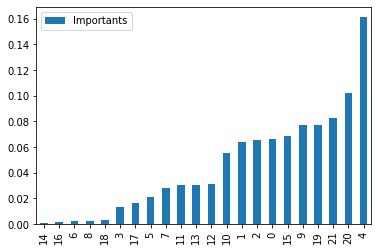

In [ ]:
feature=RandomForestClassifier(n_estimators=200) # made object from RandomForestClassifier
feature.fit(X_tr,y_tr) # fit the model
important_f=feature.feature_importances_ # select important features
last_features=pd.DataFrame({'Features':pd.DataFrame(X_tr).columns,'Importants':important_f})
last_features.set_index('Importants')
last_features=last_features.sort_values('Importants')
last_features.plot.bar()

### **Trial 1**

According to feature selection from previous trial 0, I removed all features that have a small correlation,so I removed 9 features that have a low correlation,but when I trained the model, the f1 score is very low on kaggle (0.68619).
So I removed only the lowest 5 features. so I will use 16 features

**In this trial 1**, I preprocessed the marchant_info_subtitle column. \
I added hyper parameters to improve model performance.

**My thoughts and observations :** I think this trial will be better than trial 0 because I was doing feature selection so it will help me improving model perfomance.I thought the f1 score would be between 0.75-0.77.

##### Read Training and Testing data

In [ ]:
#read all our traning data
df_tr = pd.read_csv ('/content/drive/MyDrive/Queens_Practical/Data_Mining/compt1/train_new.csv')
df_tr.head(5)

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,8.00,7,EUR,10000,1,4.0,1670,0,0,0,0,"Summer,soildcolor,Plus Size,Tank,camisole,Tops...",yellow,M,50,Livraison standard,3,0,30,50,NaN,NaN,CN,keepahorse,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,577fb2b368116418674befd9,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,272
1,8.00,7,EUR,1000,0,4.0,843,1,1,0,0,"bathing suit,Plus Size,bikini set,sexy swimsui...",black,L,50,Livraison standard,3,0,37,50,NaN,NaN,CN,shanghaimingqidianqikejiyouxiangongsi,上海铭启电气科技有限公司,"91 % avis positifs (25,752 notes)",25752,4.256873,566a3ef17233ff2686443082,0,NaN,summer,2020-08,1515
2,6.00,34,EUR,100,0,4.0,10,0,0,0,0,"Summer,Vest,momshirt,Get,summer t-shirts,funny...",white,L,50,Livraison standard,2,0,41,50,NaN,NaN,CN,zhaodongmei,zhaodongmei,"83 % avis positifs (3,897 notes)",3897,3.928920,5aacd6c1ccf0c83e5a6f3de0,0,NaN,summer,2020-08,940
3,4.67,4,EUR,100,1,3.0,82,0,0,0,0,"Summer,Shorts,pants,Beach,Plus Size,beachpant,...",lakeblue,XS,5,Livraison standard,1,0,25,50,NaN,NaN,CN,pookie0331,pookie0331,"87 % avis positifs (7,497 notes)",7497,4.079365,583141fbfef4094e51453d9b,0,NaN,summer,2020-08,309
4,8.00,11,EUR,1000,0,4.0,127,0,0,0,0,"Summer,Floral print,women dresses,fashion dres...",apricot,S,50,Livraison standard,3,0,15,50,1.0,Quantité limitée !,CN,shitongyi12683626,shitongyi12683626,91 % avis positifs (173 notes),173,4.306358,5d3bc9f8e13a7e654424a4cb,0,NaN,summer,2020-08,226


In [ ]:
#read all our testing data
df_test = pd.read_csv ('/content/drive/MyDrive/Queens_Practical/Data_Mining/compt1/test_new.csv')
df_test.head(5)

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,5.75,5,EUR,10,1,0,0,0,0,0,"Funny,letter print,Fashion,Shirt,Sleeve,Summer...",white,XS,5,Livraison standard,2,0,139,50,NaN,NaN,CN,liyang163,liyang163,33 % avis positifs (3 notes),3,2.333333,5e63469b2fdc774466e15dd5,0,NaN,summer,2020-08,937
1,7.00,7,EUR,5000,0,579,0,0,0,0,"Women Vest,Vest,Fashion,Women Blouse,long dres...",black,XS,50,Livraison standard,2,0,31,50,NaN,NaN,CN,singing the song,singingthesong,"86 % avis positifs (4,213 notes)",4213,4.058391,583547f417dc6224cb464117,0,NaN,summer,2020-08,270
2,5.00,16,EUR,1000,1,62,0,0,0,0,"hollowouttanktop,Tanktops for women,Plus Size,...",blue,XS,20,Livraison standard,2,0,41,50,NaN,NaN,CN,Surper boutique,surperboutique,"85 % avis positifs (10,501 notes)",10501,4.029235,57086fd7fa6bee434d0e5852,0,NaN,summer,2020-08,308
3,18.00,27,EUR,5000,1,1903,0,0,0,0,"men jeans,Shorts,Summer,Vintage,Denim,Men,casu...",blue,M,50,Livraison standard,5,0,42,50,NaN,NaN,CN,postonny,postonny,"86 % avis positifs (15,855 notes)",15855,4.052917,5a17b55d1f4d8c4f0b44b0ce,0,NaN,summer,2020-08,913
4,12.00,81,EUR,20000,0,1799,0,0,0,0,"Shorts,Lace,pants,Dress,Women Leggings,Hot pan...",white,M,50,Livraison standard,3,0,38,50,NaN,NaN,CN,fashionforgirls,guangzhouchanny,"88 % avis positifs (151,914 notes)",151914,4.127921,53aa664438d3046ee44a5024,0,NaN,summer,2020-08,403


#### Preprocessing

##### Drop unimportant data from traing and testing data

###### Traing data

In [ ]:
# Drop unimportant traing features
df_tr.drop(columns=['badge_local_product','badge_fast_shipping','shipping_is_express','countries_shipped_to','has_urgency_banner','urgency_text','merchant_profile_picture','merchant_name','shipping_option_name','merchant_has_profile_picture','merchant_rating_count','shipping_option_price','origin_country'],inplace=True)

In [ ]:
#Drop features that have (unique or same) value
print(df_tr['currency_buyer'].unique())
print('-------------')
print(df_tr['theme'].unique())
print('-------------')
print(df_tr['crawl_month'].unique())
df_tr.drop(columns=['currency_buyer','theme','crawl_month'],inplace=True)

['EUR']
-------------
['summer']
-------------
['2020-08']


###### Testing data

In [ ]:
# Drop unimportant testing features
df_test.drop(columns=['badge_local_product','badge_fast_shipping','shipping_is_express','countries_shipped_to','has_urgency_banner','urgency_text','merchant_profile_picture','merchant_name','shipping_option_name','merchant_has_profile_picture','merchant_rating_count','shipping_option_price','origin_country'],inplace=True)

In [ ]:
#Drop features that have (unique or same) value
print(df_test['currency_buyer'].unique())
print('-------------')
print(df_test['theme'].unique())
print('-------------')
print(df_test['crawl_month'].unique())
df_test.drop(columns=['currency_buyer','theme','crawl_month'],inplace=True)

['EUR']
-------------
['summer']
-------------
['2020-08']


##### Clean product_variation_size_id

###### Taining data

In [ ]:
print(df_tr['product_variation_size_id'].unique())    # How many unique value

['M' 'L' 'XS' 'S' 'XL' '26(Waist 72cm 28inch)' 'S.' 'S(bust 88cm)' 'XXS'
 's' '29' nan 'choose a size' 'XXXS' 'Base Coat' 'Size M' 'XXL' 'M.' 'XS.'
 '100 x 100cm(39.3 x 39.3inch)' '2pcs' '4XL' '1' '25-S' 'Size-XXS'
 '5PAIRS' '35' 'Pack of 1' 'Size S' 'Size-S' '6XL' '25' 'S/M(child)' '60'
 'Size-XS' 'S (waist58-62cm)' 'SIZE XXS' '10 ml' 'X   L' 'Women Size 36'
 '04-3XL' 'Size -XXS' '1 pc.' 'Floating Chair for Kid' 'S Pink' '34'
 'US-S' 'Size XXS' 'pants-S' 'XXXXL' 'SIZE-XXS' 'SIZE XS' '1pc' 'Size S.'
 '100 cm' 'S..' 'Round' '4-5 Years' '5' '33' '30 cm' '2' 'XXXXXL'
 '20PCS-10PAIRS' '2XL' 'Size-5XL' 'Size4XL' 'One Size' 'size S' 'Size/S'
 'B' 'SizeL' '20pcs' '1 PC - XL' 'Suit-S' 'Base & Top & Matte Top Coat'
 'Baby Float Boat' '1m by 3m' 'SIZE S' 'White' '40 cm' '5XL' '10pcs' 'H01']


In [ ]:
#convert all leters to small leters and remove any special char
df_tr['product_variation_size_id']=df_tr['product_variation_size_id'].str.lower() #Convert all leters to small leters
df_tr['product_variation_size_id']=df_tr['product_variation_size_id'].str.replace(r"\([^()]*\)", "")# Remove any parentheses and their contents
df_tr['product_variation_size_id']=df_tr['product_variation_size_id'].str.replace(r"[.\-/\&]", "")# Rmove any dot - \ or &

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [ ]:
#Remove any unimportant characters, numbers, and spaces
prod_size =df_tr['product_variation_size_id']
final_list=[]
for val in prod_size:
    # Search about any cell contain (number(0-9) followed by any number(0-...) of x and ended by (l or s) | any number of x followed by s or l | m | s followed bt space )
    # the result will be None if cell does not contain the condition
    # the result will be any number if cell contain the condition
    res_val=re.search('[0-9]x*l$|x*l$|x*s$|[0-9]x*s$|m|s\s',str(val))
    if res_val!=None:# The previous condition will be entered into the if statement if a cell achieves the condition.
        fin='' # variable to contain the result of each cell
        matchstr=res_val.start()  #matchstr contains the start index of res_val
        matchend=res_val.end()  #matchend contains the end index of res_val
        for strw in range(matchstr,matchend):  # this for loop from start index to end index that contain the condition like xxxl , m , xs, ...
            fin+=val[strw] # Collect letters and put them in fin
        final_list.append(fin)  # put fin after for loop in final_list list
    else:
        final_list.append(np.nan) # if cell does not contain previous condition so will put nan value in this cell

df_tr['product_variation_size_id']=final_list # assign final_list values to main dataframe
df_tr['product_variation_size_id']=df_tr['product_variation_size_id'].str.replace(r"\s", "") # Remove any space exist

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: The default value of regex will change from True to False in a future version.


In [ ]:
#convert any number before the letter l or s to number of xs
prod_size =df_tr['product_variation_size_id']
final_list=[]
for val in prod_size:
    # Search about any cell start with number(0-9)
    # the result will be None if cell does not contain the condition
    # the result will be any number if cell contain the condition
    res_val=re.search('^[0-9]',str(val))
    if res_val!=None: # if cell contain previous condition so will enter to if statement
        num=val[0] # put the number exist in cell in num variable
        fin='' # variable to contain the result of each cell
        for count in range(int(num)):
            fin+='x' # will convert any number to number of xs
        # after finish for loop anf put the value in fin variable 
        # I select the last letter in cell and then append it to fin to get the final value
        fin+=val[-1]
        final_list.append(fin)
    else: # if cell does not contain previous condition so it will put the same value that mean this cell contain right value
        final_list.append(val) # assign final_list values to main dataframe
df_tr['product_variation_size_id']=final_list

In [ ]:
#print product_variation_size_id shape and unique value after cleaning
print(df_tr['product_variation_size_id'].shape)
print(df_tr['product_variation_size_id'].unique())

(1094,)
['m' 'l' 'xs' 's' 'xl' nan 'xxs' 'xxxs' 'xxl' 'xxxxl' 'xxxxxs' 'xxxxxxl'
 'xxxl' 'xxxxxl']


###### Testing data

In [ ]:
print(df_test['product_variation_size_id'].unique())    # How many unique value

['XS' 'M' 'XXS' 'S' 'L' 'S(Pink & Black)' 'S(bust 88cm)' 'SizeL'
 'SIZE-XXS' 'XL' '1' '32/L' 'daughter 24M' 'XXXL' '5XL' '4' 'XS.' '1 pc.'
 '4XL' 'Size S' '2XL' 'S.' 's' '3XL' '80 X 200 CM' 'EU 35' '34' 'XXXXL'
 'XXL' '100pcs' 'SIZE XS' 'first  generation' '2pcs' 'Size--S' 'SIZE-4XL'
 'L.' 'Suit-S' 'Women Size 37' 'S Diameter 30cm' 'XXXS' 'Size-L' 'Size S.'
 'AU plug Low quality' '3 layered anklet' '17' 'size S' 'US 6.5 (EU 37)'
 'US5.5-EU35' 'EU39(US8)' nan '36' '33' 'One Size']


In [ ]:
# and 
df_test['product_variation_size_id']=df_test['product_variation_size_id'].str.lower() #Convert all leters to small leters
df_test['product_variation_size_id']=df_test['product_variation_size_id'].str.replace(r"\([^()]*\)", "") # Remove any parentheses and their contents
df_test['product_variation_size_id']=df_test['product_variation_size_id'].str.replace(r"[.\-/\&]", "") # Rmove any dot - \ or &

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [ ]:
#Remove any unimportant characters, numbers, and spaces
prod_size =df_test['product_variation_size_id']
final_list=[]
for val in prod_size:
    # Search about any cell contain (number(0-9) followed by any number(0-...) of x and ended by (l or s) | any number of x followed by s or l | m | s followed bt space )
    # the result will be None if cell does not contain the condition
    # the result will be any number if cell contain the condition
    res_val=re.search('[0-9]x*l$|x*l$|x*s$|[0-9]x*s$|m|s\s',str(val)) 
    if res_val!=None:   # The previous condition will be entered into the if statement if a cell achieves the condition.
        fin='' # variable to contain the result of each cell
        matchstr=res_val.start() #matchstr contains the start index of res_val
        matchend=res_val.end()  #matchend contains the end index of res_val
        for strw in range(matchstr,matchend): # this for loop from start index to end index that contain the condition like xxxl , m , xs, ...
            fin+=val[strw] # Collect letters and put them in fin
        final_list.append(fin) # put fin after for loop in final_list list
    else: # if cell does not contain previous condition so will put nan value in this cell
        final_list.append(np.nan) 

df_test['product_variation_size_id']=final_list # assign final_list values to main dataframe
df_test['product_variation_size_id']=df_test['product_variation_size_id'].str.replace(r"\s", "") # Remove any space exist


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: The default value of regex will change from True to False in a future version.


In [ ]:
#convert any number before the letter l or s to number of xs
prod_size =df_test['product_variation_size_id']
final_list=[]
for val in prod_size:
    # Search about any cell start with number(0-9)
    # the result will be None if cell does not contain the condition
    # the result will be any number if cell contain the condition
    res_val=re.search('^[0-9]',str(val))
    if res_val!=None: # if cell contain previous condition so will enter to if statement
        num=val[0] # put the number exist in cell in num variable
        fin='' # variable to contain the result of each cell
        for count in range(int(num)):
            fin+='x' # will convert any number to number of xs
        # after finish for loop anf put the value in fin variable 
        # I select the last letter in cell and then append it to fin to get the final value
        fin+=val[-1]
        final_list.append(fin)
    else:# if cell does not contain previous condition so it will put the same value that mean this cell contain right value
        final_list.append(val)
df_test['product_variation_size_id']=final_list # assign final_list values to main dataframe

In [ ]:
#print product_variation_size_id shape and unique value after cleaning
print(df_test['product_variation_size_id'].shape)
print(df_test['product_variation_size_id'].unique())

(479,)
['xs' 'm' 'xxs' 's' 'l' 'xl' nan 'xxl' 'xxxl' 'xxxxxl' 'xxxxl' 'xxxs']


##### Clean product_color

###### Taining data

In [ ]:
print(df_tr['product_color'].unique().shape)   # How many unique value

(88,)


In [ ]:
df_tr['product_color']=df_tr['product_color'].str.lower() #Convert all leters to small leters
df_tr['product_color']=df_tr['product_color'].str.replace(r"\([^()]*\)", "") # Remove any parentheses and their contents
df_tr['product_color']=df_tr['product_color'].str.replace(r"[.\-/\&]", "") # Rmove any dot - \ or &

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
print(df_tr['product_color'].shape) # print product_color shape
print(df_tr['product_color'].unique().shape)
print(df_tr['product_color'].unique()) # How many unique value

(1094,)
(83,)
['yellow' 'black' 'white' 'lakeblue' 'apricot' 'brown' 'winered' 'blue'
 'red' 'navyblue' 'green' 'khaki' 'white  green' 'multicolor' 'lightpink'
 'pink' 'armygreen' 'lightblue' nan 'coffee' 'grey' 'skyblue'
 'watermelonred' 'pink  black' 'whitefloral' 'purple' 'navy' 'pink  white'
 'rosered' 'orange' 'mintgreen' 'leopardprint' 'gray' 'navy blue' 'star'
 'rose' 'lightyellow' 'camouflage' 'black  yellow' 'whitestripe'
 'navyblue  white' 'black  blue' 'lightred' 'violet' 'gold' 'black  green'
 'white  black' 'burgundy' 'black  white' 'lightgrey' 'coolblack'
 'lightgreen' 'beige' 'darkblue' 'darkgreen' 'silver' 'wine red'
 'army green' 'pink  blue' 'rainbow' 'claret' 'floral' 'brown  yellow'
 'light green' 'blue  pink' 'dustypink' 'camel' 'orangered' 'rosegold'
 'ivory' 'fluorescentgreen' 'winered  yellow' 'offwhite' 'lightgray'
 'wine' 'army' 'applegreen' 'nude' 'pink  grey' 'rose red' 'denimblue'
 'blackwhite' 'leopard']


###### Testing data

In [ ]:
print(df_test['product_color'].unique())   # How many unique value

['white' 'black' 'blue' 'yellow' 'winered' 'navyblue' 'gray' 'grey' nan
 'green' 'pink' 'armygreen' 'red' 'black & green' 'lightblue'
 'pink & blue' 'orange' 'rosered' 'purple' 'watermelonred' 'coralred'
 'apricot' 'multicolor' 'tan' 'orange & camouflage' 'white & green'
 'army green' 'brown' 'silver' 'offblack' 'rose' 'jasper' 'beige' 'Pink'
 'floral' 'lightyellow' 'white & red' 'red & blue' 'khaki' 'camel'
 'leopard' 'camouflage' 'greysnakeskinprint' 'fluorescentgreen' 'coffee'
 'lightpurple' 'black & stripe' 'lightgreen' 'darkblue' 'navy' 'wine'
 'lightkhaki' 'pink & grey' 'prussianblue' 'skyblue' 'gray & white'
 'orange-red']


In [ ]:
#convert all leters to small leters and remove any special char
df_test['product_color']=df_test['product_color'].str.lower() #Convert all leters to small leters
df_test['product_color']=df_test['product_color'].str.replace(r"\([^()]*\)", "") # Remove any parentheses and their contents
df_test['product_color']=df_test['product_color'].str.replace(r"[.\-/\&]", "") # Rmove any dot - \ or &

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [ ]:
#print product_color shape and unique value after cleaning
print(df_test['product_color'].shape)
print(df_test['product_color'].unique())

(479,)
['white' 'black' 'blue' 'yellow' 'winered' 'navyblue' 'gray' 'grey' nan
 'green' 'pink' 'armygreen' 'red' 'black  green' 'lightblue' 'pink  blue'
 'orange' 'rosered' 'purple' 'watermelonred' 'coralred' 'apricot'
 'multicolor' 'tan' 'orange  camouflage' 'white  green' 'army green'
 'brown' 'silver' 'offblack' 'rose' 'jasper' 'beige' 'floral'
 'lightyellow' 'white  red' 'red  blue' 'khaki' 'camel' 'leopard'
 'camouflage' 'greysnakeskinprint' 'fluorescentgreen' 'coffee'
 'lightpurple' 'black  stripe' 'lightgreen' 'darkblue' 'navy' 'wine'
 'lightkhaki' 'pink  grey' 'prussianblue' 'skyblue' 'gray  white'
 'orangered']


##### Clean merchant_info_subtitle

###### Training data

In [ ]:
df_tr['merchant_info_subtitle']=df_tr['merchant_info_subtitle'].str.replace(r"\([^()]*\)", "80") #Removing paraenthesis andt its
df_tr['merchant_info_subtitle']=df_tr['merchant_info_subtitle'].str.replace(r"[.\-/\&]", "")  # Removing any special characters
df_tr['merchant_info_subtitle']=df_tr['merchant_info_subtitle'].str.replace(r"[a-zA-Z]", "") # Removing any english characters
df_tr['merchant_info_subtitle']=df_tr['merchant_info_subtitle'].str.replace(r"%\s*[0-9][0-9]", "") # Removing any % and every thing after %
df_tr['merchant_info_subtitle']=df_tr['merchant_info_subtitle'].str.replace(r"%", "") # Removing any %
df_tr['merchant_info_subtitle']=df_tr['merchant_info_subtitle'].str.encode('ascii','ignore').str.decode('ascii')# Removing any non english characters
df_tr['merchant_info_subtitle']=df_tr['merchant_info_subtitle'].str.replace(r"\s[0-9]*", "") # Removing any space exist

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys


In [ ]:
print(df_tr['merchant_info_subtitle'].unique()) # print unique values in merchant_info_subtitle
print(df_tr['merchant_info_subtitle'].shape)

['88' '91' '83' '87' '80' '82' '93' '89' '85' '90' '94' '81' '79' '86'
 '84' '92' '95' '73' '61' '65' '74' '70' '68' '76' '96' '53' '100' '78'
 '77' '59' '75' '71' '97' '56']
(1094,)


In [ ]:
df_tr['merchant_info_subtitle']=df_tr['merchant_info_subtitle'].astype(int) #convert object to int value

In [ ]:
print(df_tr['merchant_info_subtitle'].unique()) # print unique values in merchant_info_subtitle
print(df_tr['merchant_info_subtitle'].shape)
# print(df_tr['merchant_info_subtitle'].value_counts())

[ 88  91  83  87  80  82  93  89  85  90  94  81  79  86  84  92  95  73
  61  65  74  70  68  76  96  53 100  78  77  59  75  71  97  56]
(1094,)


###### Testing data

In [ ]:
print(df_test['merchant_info_subtitle'].unique())   # How many unique value

['33 % avis positifs (3 notes)' '86 % avis positifs (4,213 notes)'
 '85 % avis positifs (10,501 notes)' '86 % avis positifs (15,855 notes)'
 '88 % avis positifs (151,914 notes)' '85 % avis positifs (193 notes)'
 '91 % avis positifs (3,396 notes)' '87 % avis positifs (50,864 notes)'
 '89 % avis positifs (139,788 notes)' '86 % avis positifs (7,627 notes)'
 '(96,838 notes)' '83 % avis positifs (12,441 notes)'
 '84 % avis positifs (9,470 notes)' '80 % avis positifs (435 notes)'
 '91 % avis positifs (4,758 notes)' '85 % avis positifs (130,598 notes)'
 '93 % avis positifs (3,276 notes)' '(99,283 notes)'
 '73 % avis positifs (71 notes)' '85 % avis positifs (27,175 notes)'
 '91 % avis positifs (213,709 notes)' '(4,150 notes)'
 '77 % avis positifs (232 notes)' '86 % avis positifs (15,436 notes)'
 '77 % avis positifs (626 notes)' '83 % avis positifs (247 notes)'
 '(11,900 notes)' '90 % avis positifs (2,495 notes)'
 '88 % avis positifs (1,160 notes)'
 '90% opinii pozytywnych (liczba ocen: 6,555)'

In [ ]:
df_test['merchant_info_subtitle']=df_test['merchant_info_subtitle'].str.replace(r"\([^()]*\)", "80") #Removing paraenthesis andt its
df_test['merchant_info_subtitle']=df_test['merchant_info_subtitle'].str.replace(r"[.\-/\&]", "")  # Removing any special characters
df_test['merchant_info_subtitle']=df_test['merchant_info_subtitle'].str.replace(r"[a-zA-Z]", "") # Removing any english characters
df_test['merchant_info_subtitle']=df_test['merchant_info_subtitle'].str.replace(r"%\s*[0-9][0-9]", "") # Removing any %
df_test['merchant_info_subtitle']=df_test['merchant_info_subtitle'].str.replace(r"%", "") # Removing any %
df_test['merchant_info_subtitle']=df_test['merchant_info_subtitle'].str.encode('ascii','ignore').str.decode('ascii')# Removing any non english characters
df_test['merchant_info_subtitle']=df_test['merchant_info_subtitle'].str.replace(r"^\s", "") # Removing any cell start with space
df_test['merchant_info_subtitle']=df_test['merchant_info_subtitle'].str.replace(r"\s[0-9]*", "") # Removing any space exist

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  import sys
/usr/local/lib/python3

In [ ]:
df_test['merchant_info_subtitle'].fillna(method='bfill', axis=0,inplace=True) # fill nan value by back fill
df_test['merchant_info_subtitle']=df_test['merchant_info_subtitle'].astype(int) #convert object to int value

In [ ]:
print(df_test['merchant_info_subtitle'].unique()) # print unique values in merchant_info_subtitle
print(df_test['merchant_info_subtitle'].shape)

[33 86 85 88 91 87 89 80 83 84 93 73 77 90 76 82 81 79 92 94 75 95 71 78
 67 70]
(479,)


##### Handeling NaN values

###### Taining data

In [ ]:
# Check number of missing data exist
df_tr.isnull().sum()

price                           0
retail_price                    0
units_sold                      0
uses_ad_boosts                  0
rating                          0
rating_count                    0
badges_count                    0
badge_product_quality           0
tags                            0
product_color                  29
product_variation_size_id      38
product_variation_inventory     0
inventory_total                 0
merchant_title                  0
merchant_info_subtitle          0
merchant_rating                 0
merchant_id                     0
id                              0
dtype: int64

In [ ]:
#fill Nan with appropriate values
df_tr['product_color'].fillna(method='bfill', axis=0,inplace=True) # fill nan values with back fill
df_tr['product_variation_size_id'].fillna(method='bfill', axis=0,inplace=True)# fill nan values with back fill
df_tr

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_product_quality,tags,product_color,product_variation_size_id,product_variation_inventory,inventory_total,merchant_title,merchant_info_subtitle,merchant_rating,merchant_id,id
0,8.00,7,10000,1,4.0,1670,0,0,"Summer,soildcolor,Plus Size,Tank,camisole,Tops...",yellow,m,50,50,keepahorse,88,4.137582,577fb2b368116418674befd9,272
1,8.00,7,1000,0,4.0,843,1,0,"bathing suit,Plus Size,bikini set,sexy swimsui...",black,l,50,50,shanghaimingqidianqikejiyouxiangongsi,91,4.256873,566a3ef17233ff2686443082,1515
2,6.00,34,100,0,4.0,10,0,0,"Summer,Vest,momshirt,Get,summer t-shirts,funny...",white,l,50,50,zhaodongmei,83,3.928920,5aacd6c1ccf0c83e5a6f3de0,940
3,4.67,4,100,1,3.0,82,0,0,"Summer,Shorts,pants,Beach,Plus Size,beachpant,...",lakeblue,xs,5,50,pookie0331,87,4.079365,583141fbfef4094e51453d9b,309
4,8.00,11,1000,0,4.0,127,0,0,"Summer,Floral print,women dresses,fashion dres...",apricot,s,50,50,shitongyi12683626,91,4.306358,5d3bc9f8e13a7e654424a4cb,226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,4.00,4,10000,0,4.0,2150,0,0,"corset top,Fashion,crop top,camisole,knittop,T...",red,s,50,50,fantastic_tune,92,4.311066,53f2db3c104dae6bcae0c271,1381
1090,5.00,5,1000,0,5.0,377,1,1,"Blues,Summer,luggagesticker,Bicycle,cute,fresh...",purple,m,31,50,zzbllss,80,4.422521,592968ba63950d682ca4b195,212
1091,9.00,48,1000,1,4.0,135,0,0,"Summer,Vest,Fashion,Tank,camisole,Halter,Beaut...",purple,m,50,50,OIUG 56465,78,3.748794,5b6ec2f2838d931d2fbf7a28,163
1092,11.00,10,10000,1,4.0,1479,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,letter pri...",black,m,50,50,yubenqiang,83,3.936382,58330d7def56284f7634e5e5,674


###### Testing data

In [ ]:
# Check number of missing data exist
df_test.isnull().sum()

price                           0
retail_price                    0
units_sold                      0
uses_ad_boosts                  0
rating_count                    0
badges_count                    0
badge_product_quality           0
tags                            0
product_color                  12
product_variation_size_id      18
product_variation_inventory     0
inventory_total                 0
merchant_title                  0
merchant_info_subtitle          0
merchant_rating                 0
merchant_id                     0
id                              0
dtype: int64

In [ ]:
#fill Nan with appropriate values
df_test['product_color'].fillna(method='bfill', axis=0,inplace=True) # fill nan values with back fill
df_test['product_variation_size_id'].fillna(method='bfill', axis=0,inplace=True)# fill nan values with back fill
df_test

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_product_quality,tags,product_color,product_variation_size_id,product_variation_inventory,inventory_total,merchant_title,merchant_info_subtitle,merchant_rating,merchant_id,id
0,5.75,5,10,1,0,0,0,"Funny,letter print,Fashion,Shirt,Sleeve,Summer...",white,xs,5,50,liyang163,33,2.333333,5e63469b2fdc774466e15dd5,937
1,7.00,7,5000,0,579,0,0,"Women Vest,Vest,Fashion,Women Blouse,long dres...",black,xs,50,50,singing the song,86,4.058391,583547f417dc6224cb464117,270
2,5.00,16,1000,1,62,0,0,"hollowouttanktop,Tanktops for women,Plus Size,...",blue,xs,20,50,Surper boutique,85,4.029235,57086fd7fa6bee434d0e5852,308
3,18.00,27,5000,1,1903,0,0,"men jeans,Shorts,Summer,Vintage,Denim,Men,casu...",blue,m,50,50,postonny,86,4.052917,5a17b55d1f4d8c4f0b44b0ce,913
4,12.00,81,20000,0,1799,0,0,"Shorts,Lace,pants,Dress,Women Leggings,Hot pan...",white,m,50,50,fashionforgirls,88,4.127921,53aa664438d3046ee44a5024,403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,16.00,14,100,1,27,0,0,"mensummertshirt,Summer,Fashion,Men's Fashion,S...",black,m,50,50,HERNADEZYELI,70,3.367133,5dc818ca030a154e48a3a8af,1166
475,6.00,17,5000,1,817,0,0,"blouse,Summer,Vest,Plus Size,letter print,cute...",blue,xxs,1,50,First Crush,87,4.079644,587f85cbb8038f4cb049c56c,1416
476,4.83,51,50,1,1,0,0,"blouse,Summer,Plus Size,Tops & Blouses,Shirt,W...",white,xs,3,50,saulstore,85,3.824561,5e3c5fbfe217d492138970c1,63
477,3.00,3,100,1,8,0,0,"Summer,slideslipper,Sandals,fur,Indoor,Fox,Ind...",black,s,3,50,lkwelyly,87,4.056169,5c6d6c28619caa1d94891d06,626


##### Lable Encoder

A Lable Encoder is used to convert categorical data into numerical.

###### Taining data

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df_tr['product_color']= label_encoder.fit_transform(df_tr['product_color'])
df_tr['product_variation_size_id']= label_encoder.fit_transform(df_tr['product_variation_size_id'])
df_tr['merchant_id']= label_encoder.fit_transform(df_tr['merchant_id'])
df_tr['merchant_title']= label_encoder.fit_transform(df_tr['merchant_title'])
df_tr['tags']= label_encoder.fit_transform(df_tr['tags'])
df_tr.head(5)

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_product_quality,tags,product_color,product_variation_size_id,product_variation_inventory,inventory_total,merchant_title,merchant_info_subtitle,merchant_rating,merchant_id,id
0,8.00,7,10000,1,4.0,1670,0,0,562,81,1,50,50,472,88,4.137582,201,272
1,8.00,7,1000,0,4.0,843,1,0,650,6,0,50,50,584,91,4.256873,132,1515
2,6.00,34,100,0,4.0,10,0,0,493,72,0,50,50,725,83,3.928920,498,940
3,4.67,4,100,1,3.0,82,0,0,410,34,4,5,50,556,87,4.079365,272,309
4,8.00,11,1000,0,4.0,127,0,0,225,1,2,50,50,597,91,4.306358,614,226


In [ ]:
df_tr.dtypes # Check DataFrame column types

price                          float64
retail_price                     int64
units_sold                       int64
uses_ad_boosts                   int64
rating                         float64
rating_count                     int64
badges_count                     int64
badge_product_quality            int64
tags                             int64
product_color                    int64
product_variation_size_id        int64
product_variation_inventory      int64
inventory_total                  int64
merchant_title                   int64
merchant_info_subtitle           int64
merchant_rating                float64
merchant_id                      int64
id                               int64
dtype: object

###### Testing data

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df_test['product_color']= label_encoder.fit_transform(df_test['product_color'])
df_test['product_variation_size_id']= label_encoder.fit_transform(df_test['product_variation_size_id'])
df_test['merchant_id']= label_encoder.fit_transform(df_test['merchant_id'])
df_test['merchant_title']= label_encoder.fit_transform(df_test['merchant_title'])
df_test['tags']= label_encoder.fit_transform(df_test['tags'])
df_test.head(5)

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_product_quality,tags,product_color,product_variation_size_id,product_variation_inventory,inventory_total,merchant_title,merchant_info_subtitle,merchant_rating,merchant_id,id
0,5.75,5,10,1,0,0,0,26,49,4,5,50,250,33,2.333333,380,937
1,7.00,7,5000,0,579,0,0,303,4,4,50,50,321,86,4.058391,163,270
2,5.00,16,1000,1,62,0,0,396,7,4,20,50,114,85,4.029235,94,308
3,18.00,27,5000,1,1903,0,0,401,7,1,50,50,286,86,4.052917,255,913
4,12.00,81,20000,0,1799,0,0,66,49,1,50,50,187,88,4.127921,7,403


In [ ]:
df_test.dtypes # Check DataFrame column types

price                          float64
retail_price                     int64
units_sold                       int64
uses_ad_boosts                   int64
rating_count                     int64
badges_count                     int64
badge_product_quality            int64
tags                             int64
product_color                    int64
product_variation_size_id        int64
product_variation_inventory      int64
inventory_total                  int64
merchant_title                   int64
merchant_info_subtitle           int64
merchant_rating                float64
merchant_id                      int64
id                               int64
dtype: object

#### Model

##### Splitting

I split the data into X and y. \
Then I tried to do data normalisation in both training and testing data,but when I used it, the f1 score was small, so I removed it.

###### Trainig data

In [ ]:
#splitting Trainig data into X_tr and y_tr
data=df_tr # put training dataframe in data variable
y_tr=data['rating'] # put rating col in y_tr
X_tr=data.drop(columns=['rating','id'])# put all columns except rating and id columns in X_tr
X_tr

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_product_quality,tags,product_color,product_variation_size_id,product_variation_inventory,inventory_total,merchant_title,merchant_info_subtitle,merchant_rating,merchant_id
0,8.00,7,10000,1,1670,0,0,562,81,1,50,50,472,88,4.137582,201
1,8.00,7,1000,0,843,1,0,650,6,0,50,50,584,91,4.256873,132
2,6.00,34,100,0,10,0,0,493,72,0,50,50,725,83,3.928920,498
3,4.67,4,100,1,82,0,0,410,34,4,5,50,556,87,4.079365,272
4,8.00,11,1000,0,127,0,0,225,1,2,50,50,597,91,4.306358,614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,4.00,4,10000,0,2150,0,0,768,62,2,50,50,399,92,4.311066,24
1090,5.00,5,1000,0,377,1,1,9,60,1,31,50,746,80,4.422521,400
1091,9.00,48,1000,1,135,0,0,458,60,1,50,50,187,78,3.748794,581
1092,11.00,10,10000,1,1479,0,0,371,6,1,50,50,708,83,3.936382,276


###### Testing data

In [ ]:
X_text=df_test.drop(columns=['id']) # put rating col in y_tr
X_text

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_product_quality,tags,product_color,product_variation_size_id,product_variation_inventory,inventory_total,merchant_title,merchant_info_subtitle,merchant_rating,merchant_id
0,5.75,5,10,1,0,0,0,26,49,4,5,50,250,33,2.333333,380
1,7.00,7,5000,0,579,0,0,303,4,4,50,50,321,86,4.058391,163
2,5.00,16,1000,1,62,0,0,396,7,4,20,50,114,85,4.029235,94
3,18.00,27,5000,1,1903,0,0,401,7,1,50,50,286,86,4.052917,255
4,12.00,81,20000,0,1799,0,0,66,49,1,50,50,187,88,4.127921,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,16.00,14,100,1,27,0,0,402,4,1,50,50,48,70,3.367133,359
475,6.00,17,5000,1,817,0,0,365,7,6,1,50,41,87,4.079644,193
476,4.83,51,50,1,1,0,0,357,49,4,3,50,307,85,3.824561,372
477,3.00,3,100,1,8,0,0,276,4,2,3,50,252,87,4.056169,317


##### Model impplementation

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state = 0)
DT.fit(X_tr,y_tr)
print(DT.score(X_tr, y_tr))

0.9926873857404022


I tried to use max_depth and random_state parameters with max_features but they gave me low f1 scores so I removed these two hyperparameters to improve performance. \
In criterion, I chose entropy as Gini gave me a low F1 score. \
I tried different values in the max_features parameter, but that gave me an appropriate value from 1-16.

In [ ]:
dtreeparam_grid = {
    # 'max_depth': np.arange(1,15),
    'max_features': np.arange(1,16)   # The maximum number of features is from 1 to 16.
    # 'random_state': [4]
}
DT_search = GridSearchCV(DT, refit = True,param_grid = dtreeparam_grid, verbose = 1, cv=11, scoring='f1_micro') # The gridsearch function that tried all hyperparameters and chose the best hyperparameter in dtreeparam_grid and this by cross validation
DT_search.fit(X_tr , y_tr) # fit the model

paralist = []
paralist = list(DT_search.best_params_.values()) # put best values in paralist list

DT = DecisionTreeClassifier(criterion = "entropy", max_features =paralist[0])

Fitting 11 folds for each of 15 candidates, totalling 165 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=11.
  UserWarning,


In [ ]:
DT.fit(X_tr, y_tr) # fit the model after chose the best hyper parameters
print(DT.score(X_tr, y_tr))

0.9926873857404022


In [ ]:
y_pred=DT.predict(X_text)  # Testing model
y_pred

array([5., 4., 3., 5., 4., 5., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 5., 4., 5., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 3., 5., 4., 3., 4., 4., 3., 4., 5., 3., 4., 4.,
       5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3.,
       4., 4., 4., 4., 5., 5., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 5.,
       4., 4., 5., 3., 4., 4., 4., 4., 3., 4., 4., 4., 4., 3., 4., 4., 5.,
       4., 5., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 3., 4., 4., 3., 4.,
       4., 4., 4., 4., 4., 4., 4., 5., 5., 4., 4., 3., 4., 4., 3., 4., 4.,
       4., 4., 5., 3., 4., 4., 4., 3., 4., 4., 4., 4., 3., 4., 4., 4., 5.,
       3., 4., 5., 4., 3., 4., 4., 4., 4., 4., 3., 4., 4., 4., 5., 4., 4.,
       5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 5., 3., 3., 4., 4.,
       4., 5., 4., 3., 4.

To write the result in the excel sheet

In [ ]:
predt= pd.DataFrame({'rating':y_pred}) 

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Queens_Practical/Data_Mining/compt1/sample_submission_new.csv')
df['id']=df_test['id']
df['rating']=predt
df.to_csv('/content/drive/MyDrive/Queens_Practical/Data_Mining/compt1/sample_submission_new.csv',index=False)

##### Result

f1_score is 0.73221

## **Support Vector Machine**

### **Trial 0**

* I will use 23 features.
* I will do "Clean to product_variation_size_id" and "Clean to product_color" only.
* I will do the same clean in Clean to product_variation_size_id col, but in product_color col I will change my way of cleaning.
* I will use the SVM model with defualt parameters(without hyperparameters).

**My thoughts and observations:** I think the f1 score would be between 0.65 and 0.70.

##### Read Training and Testing data

In [ ]:
#read all our traning data
df_tr = pd.read_csv ('/content/drive/MyDrive/Queens_Practical/Data_Mining/compt1/train_new.csv')
df_tr.head(5)

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,8.00,7,EUR,10000,1,4.0,1670,0,0,0,0,"Summer,soildcolor,Plus Size,Tank,camisole,Tops...",yellow,M,50,Livraison standard,3,0,30,50,NaN,NaN,CN,keepahorse,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,577fb2b368116418674befd9,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,272
1,8.00,7,EUR,1000,0,4.0,843,1,1,0,0,"bathing suit,Plus Size,bikini set,sexy swimsui...",black,L,50,Livraison standard,3,0,37,50,NaN,NaN,CN,shanghaimingqidianqikejiyouxiangongsi,上海铭启电气科技有限公司,"91 % avis positifs (25,752 notes)",25752,4.256873,566a3ef17233ff2686443082,0,NaN,summer,2020-08,1515
2,6.00,34,EUR,100,0,4.0,10,0,0,0,0,"Summer,Vest,momshirt,Get,summer t-shirts,funny...",white,L,50,Livraison standard,2,0,41,50,NaN,NaN,CN,zhaodongmei,zhaodongmei,"83 % avis positifs (3,897 notes)",3897,3.928920,5aacd6c1ccf0c83e5a6f3de0,0,NaN,summer,2020-08,940
3,4.67,4,EUR,100,1,3.0,82,0,0,0,0,"Summer,Shorts,pants,Beach,Plus Size,beachpant,...",lakeblue,XS,5,Livraison standard,1,0,25,50,NaN,NaN,CN,pookie0331,pookie0331,"87 % avis positifs (7,497 notes)",7497,4.079365,583141fbfef4094e51453d9b,0,NaN,summer,2020-08,309
4,8.00,11,EUR,1000,0,4.0,127,0,0,0,0,"Summer,Floral print,women dresses,fashion dres...",apricot,S,50,Livraison standard,3,0,15,50,1.0,Quantité limitée !,CN,shitongyi12683626,shitongyi12683626,91 % avis positifs (173 notes),173,4.306358,5d3bc9f8e13a7e654424a4cb,0,NaN,summer,2020-08,226


In [ ]:
#read all our testing data
df_test = pd.read_csv ('/content/drive/MyDrive/Queens_Practical/Data_Mining/compt1/test_new.csv')
df_test.head(5)

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,5.75,5,EUR,10,1,0,0,0,0,0,"Funny,letter print,Fashion,Shirt,Sleeve,Summer...",white,XS,5,Livraison standard,2,0,139,50,NaN,NaN,CN,liyang163,liyang163,33 % avis positifs (3 notes),3,2.333333,5e63469b2fdc774466e15dd5,0,NaN,summer,2020-08,937
1,7.00,7,EUR,5000,0,579,0,0,0,0,"Women Vest,Vest,Fashion,Women Blouse,long dres...",black,XS,50,Livraison standard,2,0,31,50,NaN,NaN,CN,singing the song,singingthesong,"86 % avis positifs (4,213 notes)",4213,4.058391,583547f417dc6224cb464117,0,NaN,summer,2020-08,270
2,5.00,16,EUR,1000,1,62,0,0,0,0,"hollowouttanktop,Tanktops for women,Plus Size,...",blue,XS,20,Livraison standard,2,0,41,50,NaN,NaN,CN,Surper boutique,surperboutique,"85 % avis positifs (10,501 notes)",10501,4.029235,57086fd7fa6bee434d0e5852,0,NaN,summer,2020-08,308
3,18.00,27,EUR,5000,1,1903,0,0,0,0,"men jeans,Shorts,Summer,Vintage,Denim,Men,casu...",blue,M,50,Livraison standard,5,0,42,50,NaN,NaN,CN,postonny,postonny,"86 % avis positifs (15,855 notes)",15855,4.052917,5a17b55d1f4d8c4f0b44b0ce,0,NaN,summer,2020-08,913
4,12.00,81,EUR,20000,0,1799,0,0,0,0,"Shorts,Lace,pants,Dress,Women Leggings,Hot pan...",white,M,50,Livraison standard,3,0,38,50,NaN,NaN,CN,fashionforgirls,guangzhouchanny,"88 % avis positifs (151,914 notes)",151914,4.127921,53aa664438d3046ee44a5024,0,NaN,summer,2020-08,403


#### Preprocessing

##### Drop unimportant data from traing and testing data

###### Traing data

In [ ]:
# Drop unimportant traing features
df_tr.drop(columns=['tags','urgency_text','merchant_id','merchant_profile_picture','merchant_name','merchant_title','merchant_info_subtitle','merchant_title','shipping_option_name'],inplace=True)

In [ ]:
#Drop features that have (unique or same) value
print(df_tr['currency_buyer'].unique())
print('-------------')
print(df_tr['theme'].unique())
print('-------------')
print(df_tr['crawl_month'].unique())
df_tr.drop(columns=['currency_buyer','theme','crawl_month'],inplace=True)

['EUR']
-------------
['summer']
-------------
['2020-08']


###### Testing data

In [ ]:
# Drop unimportant testing features
df_test.drop(columns=['tags','urgency_text','merchant_id','merchant_profile_picture','merchant_name','merchant_title','merchant_info_subtitle','merchant_title','shipping_option_name'],inplace=True)

In [ ]:
#Drop features that have (unique or same) value
print(df_test['currency_buyer'].unique())
print('-------------')
print(df_test['theme'].unique())
print('-------------')
print(df_test['crawl_month'].unique())
df_test.drop(columns=['currency_buyer','theme','crawl_month'],inplace=True)

['EUR']
-------------
['summer']
-------------
['2020-08']


##### Clean product_variation_size_id

###### Taining data

In [ ]:
print(df_tr['product_variation_size_id'].unique())    # How many unique value

['M' 'L' 'XS' 'S' 'XL' '26(Waist 72cm 28inch)' 'S.' 'S(bust 88cm)' 'XXS'
 's' '29' nan 'choose a size' 'XXXS' 'Base Coat' 'Size M' 'XXL' 'M.' 'XS.'
 '100 x 100cm(39.3 x 39.3inch)' '2pcs' '4XL' '1' '25-S' 'Size-XXS'
 '5PAIRS' '35' 'Pack of 1' 'Size S' 'Size-S' '6XL' '25' 'S/M(child)' '60'
 'Size-XS' 'S (waist58-62cm)' 'SIZE XXS' '10 ml' 'X   L' 'Women Size 36'
 '04-3XL' 'Size -XXS' '1 pc.' 'Floating Chair for Kid' 'S Pink' '34'
 'US-S' 'Size XXS' 'pants-S' 'XXXXL' 'SIZE-XXS' 'SIZE XS' '1pc' 'Size S.'
 '100 cm' 'S..' 'Round' '4-5 Years' '5' '33' '30 cm' '2' 'XXXXXL'
 '20PCS-10PAIRS' '2XL' 'Size-5XL' 'Size4XL' 'One Size' 'size S' 'Size/S'
 'B' 'SizeL' '20pcs' '1 PC - XL' 'Suit-S' 'Base & Top & Matte Top Coat'
 'Baby Float Boat' '1m by 3m' 'SIZE S' 'White' '40 cm' '5XL' '10pcs' 'H01']


In [ ]:
#convert all leters to small leters and remove any special char
df_tr['product_variation_size_id']=df_tr['product_variation_size_id'].str.lower() #Convert all leters to small leters
df_tr['product_variation_size_id']=df_tr['product_variation_size_id'].str.replace(r"\([^()]*\)", "")# Remove any parentheses and their contents
df_tr['product_variation_size_id']=df_tr['product_variation_size_id'].str.replace(r"[.\-/\&]", "")# Rmove any dot - \ or &

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [ ]:
#Remove any unimportant characters, numbers, and spaces
prod_size =df_tr['product_variation_size_id']
final_list=[]
for val in prod_size:
    # Search about any cell contain (number(0-9) followed by any number(0-...) of x and ended by (l or s) | any number of x followed by s or l | m | s followed bt space )
    # the result will be None if cell does not contain the condition
    # the result will be any number if cell contain the condition
    res_val=re.search('[0-9]x*l$|x*l$|x*s$|[0-9]x*s$|m|s\s',str(val))
    if res_val!=None:# The previous condition will be entered into the if statement if a cell achieves the condition.
        fin='' # variable to contain the result of each cell
        matchstr=res_val.start()  #matchstr contains the start index of res_val
        matchend=res_val.end()  #matchend contains the end index of res_val
        for strw in range(matchstr,matchend):  # this for loop from start index to end index that contain the condition like xxxl , m , xs, ...
            fin+=val[strw] # Collect letters and put them in fin
        final_list.append(fin)  # put fin after for loop in final_list list
    else:
        final_list.append(np.nan) # if cell does not contain previous condition so will put nan value in this cell

df_tr['product_variation_size_id']=final_list # assign final_list values to main dataframe
df_tr['product_variation_size_id']=df_tr['product_variation_size_id'].str.replace(r"\s", "") # Remove any space exist

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: The default value of regex will change from True to False in a future version.


In [ ]:
#convert any number before the letter l or s to number of xs
prod_size =df_tr['product_variation_size_id']
final_list=[]
for val in prod_size:
    # Search about any cell start with number(0-9)
    # the result will be None if cell does not contain the condition
    # the result will be any number if cell contain the condition
    res_val=re.search('^[0-9]',str(val))
    if res_val!=None: #The previous condition will be entered into the if statement if a cell achieves the condition.
        num=val[0] # put the number exist in cell in num variable
        fin='' # variable to contain the result of each cell
        for count in range(int(num)):
            fin+='x' # will convert any number to number of xs
        # after finish for loop anf put the value in fin variable 
        # I select the last letter in cell and then append it to fin to get the final value
        fin+=val[-1]
        final_list.append(fin)
    else: # if cell does not contain previous condition so it will put the same value that mean this cell contain right value
        final_list.append(val) # assign final_list values to main dataframe
df_tr['product_variation_size_id']=final_list

In [ ]:
#print product_variation_size_id shape and unique value after cleaning
print(df_tr['product_variation_size_id'].shape)
print(df_tr['product_variation_size_id'].unique())

(1094,)
['m' 'l' 'xs' 's' 'xl' nan 'xxs' 'xxxs' 'xxl' 'xxxxl' 'xxxxxs' 'xxxxxxl'
 'xxxl' 'xxxxxl']


###### Testing data

In [ ]:
print(df_test['product_variation_size_id'].unique())    # How many unique value

['XS' 'M' 'XXS' 'S' 'L' 'S(Pink & Black)' 'S(bust 88cm)' 'SizeL'
 'SIZE-XXS' 'XL' '1' '32/L' 'daughter 24M' 'XXXL' '5XL' '4' 'XS.' '1 pc.'
 '4XL' 'Size S' '2XL' 'S.' 's' '3XL' '80 X 200 CM' 'EU 35' '34' 'XXXXL'
 'XXL' '100pcs' 'SIZE XS' 'first  generation' '2pcs' 'Size--S' 'SIZE-4XL'
 'L.' 'Suit-S' 'Women Size 37' 'S Diameter 30cm' 'XXXS' 'Size-L' 'Size S.'
 'AU plug Low quality' '3 layered anklet' '17' 'size S' 'US 6.5 (EU 37)'
 'US5.5-EU35' 'EU39(US8)' nan '36' '33' 'One Size']


In [ ]:
# and 
df_test['product_variation_size_id']=df_test['product_variation_size_id'].str.lower() #Convert all leters to small leters
df_test['product_variation_size_id']=df_test['product_variation_size_id'].str.replace(r"\([^()]*\)", "") # Remove any parentheses and their contents
df_test['product_variation_size_id']=df_test['product_variation_size_id'].str.replace(r"[.\-/\&]", "") # Rmove any dot - \ or &

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [ ]:
#Remove any unimportant characters, numbers, and spaces
prod_size =df_test['product_variation_size_id']
final_list=[]
for val in prod_size:
    # Search about any cell contain (number(0-9) followed by any number(0-...) of x and ended by (l or s) | any number of x followed by s or l | m | s followed bt space )
    # the result will be None if cell does not contain the condition
    # the result will be any number if cell contain the condition
    res_val=re.search('[0-9]x*l$|x*l$|x*s$|[0-9]x*s$|m|s\s',str(val)) 
    if res_val!=None:   # The previous condition will be entered into the if statement if a cell achieves the condition.
        fin='' # variable to contain the result of each cell
        matchstr=res_val.start() #matchstr contains the start index of res_val
        matchend=res_val.end()  #matchend contains the end index of res_val
        for strw in range(matchstr,matchend): # this for loop from start index to end index that contain the condition like xxxl , m , xs, ...
            fin+=val[strw] # Collect letters and put them in fin
        final_list.append(fin) # put fin after for loop in final_list list
    else: # if cell does not contain previous condition so will put nan value in this cell
        final_list.append(np.nan) 

df_test['product_variation_size_id']=final_list # assign final_list values to main dataframe
df_test['product_variation_size_id']=df_test['product_variation_size_id'].str.replace(r"\s", "") # Remove any space exist


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: The default value of regex will change from True to False in a future version.


In [ ]:
#convert any number before the letter l or s to number of xs
prod_size =df_test['product_variation_size_id']
final_list=[]
for val in prod_size:
    # Search about any cell start with number(0-9)
    # the result will be None if cell does not contain the condition
    # the result will be any number if cell contain the condition
    res_val=re.search('^[0-9]',str(val))
    if res_val!=None: # The previous condition will be entered into the if statement if a cell achieves the condition.
        num=val[0] # put the number exist in cell in num variable
        fin='' # variable to contain the result of each cell
        for count in range(int(num)):
            fin+='x' # will convert any number to number of xs
        # after finish for loop anf put the value in fin variable 
        # I select the last letter in cell and then append it to fin to get the final value
        fin+=val[-1]
        final_list.append(fin)
    else:# if cell does not contain previous condition so it will put the same value that mean this cell contain right value
        final_list.append(val)
df_test['product_variation_size_id']=final_list # assign final_list values to main dataframe

In [ ]:
#print product_variation_size_id shape and unique value after cleaning
print(df_test['product_variation_size_id'].shape)
print(df_test['product_variation_size_id'].unique())

(479,)
['xs' 'm' 'xxs' 's' 'l' 'xl' nan 'xxl' 'xxxl' 'xxxxxl' 'xxxxl' 'xxxs']


##### Clean product_color

###### Taining data

In [ ]:
print(df_tr['product_color'].unique())   # How many unique value

['yellow' 'black' 'white' 'lakeblue' 'apricot' 'brown' 'winered' 'blue'
 'red' 'navyblue' 'green' 'khaki' 'White' 'white & green' 'multicolor'
 'lightpink' 'pink' 'RED' 'armygreen' 'lightblue' nan 'coffee' 'grey'
 'skyblue' 'watermelonred' 'pink & black' 'whitefloral' 'purple' 'navy'
 'pink & white' 'rosered' 'orange' 'Black' 'mintgreen' 'leopardprint'
 'gray' 'navy blue' 'star' 'rose' 'lightyellow' 'camouflage'
 'black & yellow' 'whitestripe' 'navyblue & white' 'black & blue'
 'lightred' 'violet' 'gold' 'black & green' 'white & black' 'burgundy'
 'black & white' 'lightgrey' 'coolblack' 'lightgreen' 'beige' 'darkblue'
 'darkgreen' 'silver' 'wine red' 'Army green' 'pink & blue' 'rainbow'
 'claret' 'floral' 'brown & yellow' 'light green' 'Pink' 'blue & pink'
 'dustypink' 'camel' 'orange-red' 'rosegold' 'ivory' 'fluorescentgreen'
 'winered & yellow' 'offwhite' 'lightgray' 'wine' 'army' 'applegreen'
 'nude' 'pink & grey' 'Rose red' 'denimblue' 'blackwhite' 'Blue' 'leopard']


In [ ]:
df_tr['product_color']=df_tr['product_color'].str.lower() #Convert all leters to small leters
df_tr['product_color']=df_tr['product_color'].str.replace(r"\([^()]*\)", "") # Remove any parentheses and their contents
df_tr['product_color']=df_tr['product_color'].str.replace(r"[.\-/\&]", "") # Rmove any dot - \ or &

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Any product has more than one color. I will replace its value with multicolor.
prod_size =df_tr['product_color']
final_list=[] # An empty list that will contain the final value of each cell after cleaning.
for val in prod_size:
    res_val=re.search('\s',str(val)) # It searches for any cell with empty space. If it finds any space, it means the product has two colours or more.
    if res_val!=None: # The previous condition will be entered into the if statement if a cell achieves the condition.
        final_list.append('multicolor')
    else:
        final_list.append(val)
df_tr['product_color']=final_list

In [ ]:
print(df_tr['product_color'].shape) # print product_color shape
print(df_tr['product_color'].unique().shape)
print(df_tr['product_color'].unique()) # How many unique value

(1094,)
(64,)
['yellow' 'black' 'white' 'lakeblue' 'apricot' 'brown' 'winered' 'blue'
 'red' 'navyblue' 'green' 'khaki' 'multicolor' 'lightpink' 'pink'
 'armygreen' 'lightblue' nan 'coffee' 'grey' 'skyblue' 'watermelonred'
 'whitefloral' 'purple' 'navy' 'rosered' 'orange' 'mintgreen'
 'leopardprint' 'gray' 'star' 'rose' 'lightyellow' 'camouflage'
 'whitestripe' 'lightred' 'violet' 'gold' 'burgundy' 'lightgrey'
 'coolblack' 'lightgreen' 'beige' 'darkblue' 'darkgreen' 'silver'
 'rainbow' 'claret' 'floral' 'dustypink' 'camel' 'orangered' 'rosegold'
 'ivory' 'fluorescentgreen' 'offwhite' 'lightgray' 'wine' 'army'
 'applegreen' 'nude' 'denimblue' 'blackwhite' 'leopard']


###### Testing data

In [ ]:
print(df_test['product_color'].unique())   # How many unique value

['white' 'black' 'blue' 'yellow' 'winered' 'navyblue' 'gray' 'grey' nan
 'green' 'pink' 'armygreen' 'red' 'black & green' 'lightblue'
 'pink & blue' 'orange' 'rosered' 'purple' 'watermelonred' 'coralred'
 'apricot' 'multicolor' 'tan' 'orange & camouflage' 'white & green'
 'army green' 'brown' 'silver' 'offblack' 'rose' 'jasper' 'beige' 'Pink'
 'floral' 'lightyellow' 'white & red' 'red & blue' 'khaki' 'camel'
 'leopard' 'camouflage' 'greysnakeskinprint' 'fluorescentgreen' 'coffee'
 'lightpurple' 'black & stripe' 'lightgreen' 'darkblue' 'navy' 'wine'
 'lightkhaki' 'pink & grey' 'prussianblue' 'skyblue' 'gray & white'
 'orange-red']


In [ ]:
#convert all leters to small leters and remove any special char
df_test['product_color']=df_test['product_color'].str.lower() #Convert all leters to small leters
df_test['product_color']=df_test['product_color'].str.replace(r"\([^()]*\)", "") # Remove any parentheses and their contents
df_test['product_color']=df_test['product_color'].str.replace(r"[.\-/\&]", "") # Rmove any dot - \ or &

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [ ]:
# Any product has more than one color. I will replace its value with multicolor.
prod_size =df_test['product_color']
final_list=[] # An empty list that will contain the final value of each cell after cleaning.
for val in prod_size:
    res_val=re.search('\s',str(val)) # It searches for any cell with empty space. If it finds any space, it means the product has two colours or more.
    if res_val!=None: # The previous condition will be entered into the if statement if a cell achieves the condition.
        final_list.append('multicolor')
    else:
        final_list.append(val)
df_test['product_color']=final_list

In [ ]:
#print product_color shape and unique value after cleaning
print(df_test['product_color'].shape)
print(df_test['product_color'].unique())

(479,)
['white' 'black' 'blue' 'yellow' 'winered' 'navyblue' 'gray' 'grey' nan
 'green' 'pink' 'armygreen' 'red' 'multicolor' 'lightblue' 'orange'
 'rosered' 'purple' 'watermelonred' 'coralred' 'apricot' 'tan' 'brown'
 'silver' 'offblack' 'rose' 'jasper' 'beige' 'floral' 'lightyellow'
 'khaki' 'camel' 'leopard' 'camouflage' 'greysnakeskinprint'
 'fluorescentgreen' 'coffee' 'lightpurple' 'lightgreen' 'darkblue' 'navy'
 'wine' 'lightkhaki' 'prussianblue' 'skyblue' 'orangered']


##### Handeling NaN values

###### Taining data

In [ ]:
# Check number of missing data exist
df_tr.isnull().sum()

price                             0
retail_price                      0
units_sold                        0
uses_ad_boosts                    0
rating                            0
rating_count                      0
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
product_color                    29
product_variation_size_id        38
product_variation_inventory       0
shipping_option_price             0
shipping_is_express               0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner              745
origin_country                   12
merchant_rating_count             0
merchant_rating                   0
merchant_has_profile_picture      0
id                                0
dtype: int64

In [ ]:
#fill Nan with appropriate values
df_tr['product_color'].fillna(method='bfill', axis=0,inplace=True)# fill nan values with back fill
df_tr['product_variation_size_id'].fillna(method='bfill', axis=0,inplace=True)# fill nan values with back fill
df_tr['origin_country'].fillna(method='bfill', axis=0,inplace=True)# fill nan values with back fill
df_tr['has_urgency_banner'].fillna(value=0,inplace=True)# fill nan values with 0
df_tr

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,origin_country,merchant_rating_count,merchant_rating,merchant_has_profile_picture,id
0,8.00,7,10000,1,4.0,1670,0,0,0,0,yellow,m,50,3,0,30,50,0.0,CN,66644,4.137582,1,272
1,8.00,7,1000,0,4.0,843,1,1,0,0,black,l,50,3,0,37,50,0.0,CN,25752,4.256873,0,1515
2,6.00,34,100,0,4.0,10,0,0,0,0,white,l,50,2,0,41,50,0.0,CN,3897,3.928920,0,940
3,4.67,4,100,1,3.0,82,0,0,0,0,lakeblue,xs,5,1,0,25,50,0.0,CN,7497,4.079365,0,309
4,8.00,11,1000,0,4.0,127,0,0,0,0,apricot,s,50,3,0,15,50,1.0,CN,173,4.306358,0,226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,4.00,4,10000,0,4.0,2150,0,0,0,0,red,s,50,1,0,41,50,0.0,CN,230951,4.311066,0,1381
1090,5.00,5,1000,0,5.0,377,1,0,1,0,purple,m,31,2,0,35,50,0.0,CN,2904,4.422521,0,212
1091,9.00,48,1000,1,4.0,135,0,0,0,0,purple,m,50,3,0,25,50,0.0,CN,6632,3.748794,0,163
1092,11.00,10,10000,1,4.0,1479,0,0,0,0,black,m,50,2,0,45,50,1.0,CN,5816,3.936382,0,674


###### Testing data

In [ ]:
# Check number of missing data exist
df_test.isnull().sum()

price                             0
retail_price                      0
units_sold                        0
uses_ad_boosts                    0
rating_count                      0
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
product_color                    12
product_variation_size_id        18
product_variation_inventory       0
shipping_option_price             0
shipping_is_express               0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner              355
origin_country                    5
merchant_rating_count             0
merchant_rating                   0
merchant_has_profile_picture      0
id                                0
dtype: int64

In [ ]:
#fill Nan with appropriate values
df_test['product_color'].fillna(method='bfill', axis=0,inplace=True)# fill nan values with back fill
df_test['product_variation_size_id'].fillna(method='bfill', axis=0,inplace=True)# fill nan values with back fill
df_test['origin_country'].fillna(method='bfill', axis=0,inplace=True)# fill nan values with back fill
df_test['has_urgency_banner'].fillna(value=0,inplace=True)# fill nan values with 0
df_test

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,origin_country,merchant_rating_count,merchant_rating,merchant_has_profile_picture,id
0,5.75,5,10,1,0,0,0,0,0,white,xs,5,2,0,139,50,0.0,CN,3,2.333333,0,937
1,7.00,7,5000,0,579,0,0,0,0,black,xs,50,2,0,31,50,0.0,CN,4213,4.058391,0,270
2,5.00,16,1000,1,62,0,0,0,0,blue,xs,20,2,0,41,50,0.0,CN,10501,4.029235,0,308
3,18.00,27,5000,1,1903,0,0,0,0,blue,m,50,5,0,42,50,0.0,CN,15855,4.052917,0,913
4,12.00,81,20000,0,1799,0,0,0,0,white,m,50,3,0,38,50,0.0,CN,151914,4.127921,0,403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,16.00,14,100,1,27,0,0,0,0,black,m,50,4,0,35,50,0.0,VE,572,3.367133,0,1166
475,6.00,17,5000,1,817,0,0,0,0,blue,xxs,1,2,0,41,50,0.0,CN,50864,4.079644,1,1416
476,4.83,51,50,1,1,0,0,0,0,white,xs,3,1,0,39,50,1.0,VE,57,3.824561,0,63
477,3.00,3,100,1,8,0,0,0,0,black,s,3,1,0,26,50,1.0,CN,1086,4.056169,0,626


##### Lable Encoder

A Lable Encoder is used to convert categorical data into numerical.

###### Taining data

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df_tr['product_color']= label_encoder.fit_transform(df_tr['product_color'])
df_tr['product_variation_size_id']= label_encoder.fit_transform(df_tr['product_variation_size_id'])
df_tr['origin_country']= label_encoder.fit_transform(df_tr['origin_country'])
df_tr.head(5)

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,origin_country,merchant_rating_count,merchant_rating,merchant_has_profile_picture,id
0,8.00,7,10000,1,4.0,1670,0,0,0,0,62,1,50,3,0,30,50,0.0,0,66644,4.137582,1,272
1,8.00,7,1000,0,4.0,843,1,1,0,0,5,0,50,3,0,37,50,0.0,0,25752,4.256873,0,1515
2,6.00,34,100,0,4.0,10,0,0,0,0,57,0,50,2,0,41,50,0.0,0,3897,3.928920,0,940
3,4.67,4,100,1,3.0,82,0,0,0,0,27,4,5,1,0,25,50,0.0,0,7497,4.079365,0,309
4,8.00,11,1000,0,4.0,127,0,0,0,0,1,2,50,3,0,15,50,1.0,0,173,4.306358,0,226


In [ ]:
df_tr.dtypes # Check DataFrame column types

price                           float64
retail_price                      int64
units_sold                        int64
uses_ad_boosts                    int64
rating                          float64
rating_count                      int64
badges_count                      int64
badge_local_product               int64
badge_product_quality             int64
badge_fast_shipping               int64
product_color                     int64
product_variation_size_id         int64
product_variation_inventory       int64
shipping_option_price             int64
shipping_is_express               int64
countries_shipped_to              int64
inventory_total                   int64
has_urgency_banner              float64
origin_country                    int64
merchant_rating_count             int64
merchant_rating                 float64
merchant_has_profile_picture      int64
id                                int64
dtype: object

###### Testing data

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df_test['product_color']= label_encoder.fit_transform(df_test['product_color'])
df_test['product_variation_size_id']= label_encoder.fit_transform(df_test['product_variation_size_id'])
df_test['origin_country']= label_encoder.fit_transform(df_test['origin_country'])
df_test.head(5)

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,origin_country,merchant_rating_count,merchant_rating,merchant_has_profile_picture,id
0,5.75,5,10,1,0,0,0,0,0,41,4,5,2,0,139,50,0.0,1,3,2.333333,0,937
1,7.00,7,5000,0,579,0,0,0,0,3,4,50,2,0,31,50,0.0,1,4213,4.058391,0,270
2,5.00,16,1000,1,62,0,0,0,0,4,4,20,2,0,41,50,0.0,1,10501,4.029235,0,308
3,18.00,27,5000,1,1903,0,0,0,0,4,1,50,5,0,42,50,0.0,1,15855,4.052917,0,913
4,12.00,81,20000,0,1799,0,0,0,0,41,1,50,3,0,38,50,0.0,1,151914,4.127921,0,403


In [ ]:
df_test.dtypes # Check DataFrame column types

price                           float64
retail_price                      int64
units_sold                        int64
uses_ad_boosts                    int64
rating_count                      int64
badges_count                      int64
badge_local_product               int64
badge_product_quality             int64
badge_fast_shipping               int64
product_color                     int64
product_variation_size_id         int64
product_variation_inventory       int64
shipping_option_price             int64
shipping_is_express               int64
countries_shipped_to              int64
inventory_total                   int64
has_urgency_banner              float64
origin_country                    int64
merchant_rating_count             int64
merchant_rating                 float64
merchant_has_profile_picture      int64
id                                int64
dtype: object

#### Model

##### Splitting

I split the data into X and y.\
Then I do data normalisation in both training and testing data to make the model fit fast and to make all the numbers in the same range.

###### Trainig data

In [ ]:
#splitting Trainig data into X_tr and y_tr
data=df_tr # put training dataframe in data variable
y_tr=data['rating'] # put rating col in y_tr
X_tr=data.drop(columns=['rating','id'])# put all columns except rating and id columns in X_tr
X_tr = preprocessing.MinMaxScaler().fit_transform(X_tr) # Normalize the data
X_tr = pd.DataFrame(X_tr)
X_tr

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.145833,0.020,0.099991,1.0,0.080505,0.000000,0.0,0.0,0.0,1.000000,0.083333,1.000000,0.181818,0.0,0.166667,1.0,0.0,0.0,0.030642,0.731146,1.0
1,0.145833,0.020,0.009990,0.0,0.040638,0.333333,1.0,0.0,0.0,0.080645,0.000000,1.000000,0.181818,0.0,0.219697,1.0,0.0,0.0,0.011839,0.804047,0.0
2,0.104167,0.128,0.000990,0.0,0.000482,0.000000,0.0,0.0,0.0,0.919355,0.000000,1.000000,0.090909,0.0,0.250000,1.0,0.0,0.0,0.001790,0.603628,0.0
3,0.076458,0.008,0.000990,1.0,0.003953,0.000000,0.0,0.0,0.0,0.435484,0.333333,0.081633,0.000000,0.0,0.128788,1.0,0.0,0.0,0.003445,0.695569,0.0
4,0.145833,0.036,0.009990,0.0,0.006122,0.000000,0.0,0.0,0.0,0.016129,0.166667,1.000000,0.181818,0.0,0.053030,1.0,1.0,0.0,0.000078,0.834288,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,0.062500,0.008,0.099991,0.0,0.103644,0.000000,0.0,0.0,0.0,0.774194,0.166667,1.000000,0.000000,0.0,0.250000,1.0,0.0,0.0,0.106194,0.837165,0.0
1090,0.083333,0.012,0.009990,0.0,0.018174,0.333333,0.0,1.0,0.0,0.741935,0.083333,0.612245,0.090909,0.0,0.204545,1.0,0.0,0.0,0.001333,0.905277,0.0
1091,0.166667,0.184,0.009990,1.0,0.006508,0.000000,0.0,0.0,0.0,0.741935,0.083333,1.000000,0.181818,0.0,0.128788,1.0,0.0,0.0,0.003048,0.493550,0.0
1092,0.208333,0.032,0.099991,1.0,0.071298,0.000000,0.0,0.0,0.0,0.080645,0.083333,1.000000,0.090909,0.0,0.280303,1.0,1.0,0.0,0.002672,0.608189,0.0


###### Testing data

In [ ]:
X_text=df_test.drop(columns=['id']) # put rating col in y_tr
X_text = preprocessing.MinMaxScaler().fit_transform(X_text) # Normalize the data
X_text = pd.DataFrame(X_text)
X_text

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.250000,0.023952,0.000070,1.0,0.000000,0.0,0.0,0.0,0.0,0.931818,0.4,0.081633,0.166667,0.0,0.992537,1.0,0.0,0.333333,0.000004,0.000000,0.0
1,0.315789,0.035928,0.049971,0.0,0.032202,0.0,0.0,0.0,0.0,0.068182,0.4,1.000000,0.166667,0.0,0.186567,1.0,0.0,0.333333,0.005016,0.646897,0.0
2,0.210526,0.089820,0.009970,1.0,0.003448,0.0,0.0,0.0,0.0,0.090909,0.4,0.387755,0.166667,0.0,0.261194,1.0,0.0,0.333333,0.012503,0.635963,0.0
3,0.894737,0.155689,0.049971,1.0,0.105840,0.0,0.0,0.0,0.0,0.090909,0.1,1.000000,0.666667,0.0,0.268657,1.0,0.0,0.333333,0.018878,0.644844,0.0
4,0.578947,0.479042,0.199976,0.0,0.100056,0.0,0.0,0.0,0.0,0.931818,0.1,1.000000,0.333333,0.0,0.238806,1.0,0.0,0.333333,0.180875,0.672970,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,0.789474,0.077844,0.000970,1.0,0.001502,0.0,0.0,0.0,0.0,0.068182,0.1,1.000000,0.500000,0.0,0.216418,1.0,0.0,1.000000,0.000681,0.387675,0.0
475,0.263158,0.095808,0.049971,1.0,0.045439,0.0,0.0,0.0,0.0,0.090909,0.6,0.000000,0.166667,0.0,0.261194,1.0,0.0,0.333333,0.060561,0.654866,1.0
476,0.201579,0.299401,0.000470,1.0,0.000056,0.0,0.0,0.0,0.0,0.931818,0.4,0.040816,0.000000,0.0,0.246269,1.0,1.0,1.000000,0.000068,0.559211,0.0
477,0.105263,0.011976,0.000970,1.0,0.000445,0.0,0.0,0.0,0.0,0.068182,0.2,0.040816,0.000000,0.0,0.149254,1.0,1.0,0.333333,0.001293,0.646064,0.0


##### Model impplementation

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_tr,y_tr)
print(svm.score(X_tr, y_tr))

0.726691042047532


In [ ]:
y_pred=svm.predict(X_text)  # Testing model
y_pred

array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5.,
       4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4.

To write the result in the excel sheet

In [ ]:
predt= pd.DataFrame({'rating':y_pred}) 

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Queens_Practical/Data_Mining/compt1/sample_submission_new.csv')
df['id']=df_test['id']
df['rating']=predt
df.to_csv('/content/drive/MyDrive/Queens_Practical/Data_Mining/compt1/sample_submission_new.csv',index=False)

##### Result

f1_score is 0.75732

### **Trial 1**

After Trail 0, I decided to add more columns, add hyper parameters, and change the product_color cleaning method. I thought that all of these things would improve model performance.
* I will use 25 features.
* I will do "Clean to product_variation_size_id" and "Clean to product_color" only.
* I will do the same clean in Clean to product_variation_size_id col, but in product_color col I will change my way of cleaning.
* I will use the SVM model with hyperparameters.

**My thoughts and observations:** I think the f1 score would be between 0.75 and 0.77.

##### Read Training and Testing data

In [ ]:
#read all our traning data
df_tr = pd.read_csv ('/content/drive/MyDrive/Queens_Practical/Data_Mining/compt1/train_new.csv')
df_tr.head(5)

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,8.00,7,EUR,10000,1,4.0,1670,0,0,0,0,"Summer,soildcolor,Plus Size,Tank,camisole,Tops...",yellow,M,50,Livraison standard,3,0,30,50,NaN,NaN,CN,keepahorse,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,577fb2b368116418674befd9,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,272
1,8.00,7,EUR,1000,0,4.0,843,1,1,0,0,"bathing suit,Plus Size,bikini set,sexy swimsui...",black,L,50,Livraison standard,3,0,37,50,NaN,NaN,CN,shanghaimingqidianqikejiyouxiangongsi,上海铭启电气科技有限公司,"91 % avis positifs (25,752 notes)",25752,4.256873,566a3ef17233ff2686443082,0,NaN,summer,2020-08,1515
2,6.00,34,EUR,100,0,4.0,10,0,0,0,0,"Summer,Vest,momshirt,Get,summer t-shirts,funny...",white,L,50,Livraison standard,2,0,41,50,NaN,NaN,CN,zhaodongmei,zhaodongmei,"83 % avis positifs (3,897 notes)",3897,3.928920,5aacd6c1ccf0c83e5a6f3de0,0,NaN,summer,2020-08,940
3,4.67,4,EUR,100,1,3.0,82,0,0,0,0,"Summer,Shorts,pants,Beach,Plus Size,beachpant,...",lakeblue,XS,5,Livraison standard,1,0,25,50,NaN,NaN,CN,pookie0331,pookie0331,"87 % avis positifs (7,497 notes)",7497,4.079365,583141fbfef4094e51453d9b,0,NaN,summer,2020-08,309
4,8.00,11,EUR,1000,0,4.0,127,0,0,0,0,"Summer,Floral print,women dresses,fashion dres...",apricot,S,50,Livraison standard,3,0,15,50,1.0,Quantité limitée !,CN,shitongyi12683626,shitongyi12683626,91 % avis positifs (173 notes),173,4.306358,5d3bc9f8e13a7e654424a4cb,0,NaN,summer,2020-08,226


In [ ]:
#read all our testing data
df_test = pd.read_csv ('/content/drive/MyDrive/Queens_Practical/Data_Mining/compt1/test_new.csv')
df_test.head(5)

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,5.75,5,EUR,10,1,0,0,0,0,0,"Funny,letter print,Fashion,Shirt,Sleeve,Summer...",white,XS,5,Livraison standard,2,0,139,50,NaN,NaN,CN,liyang163,liyang163,33 % avis positifs (3 notes),3,2.333333,5e63469b2fdc774466e15dd5,0,NaN,summer,2020-08,937
1,7.00,7,EUR,5000,0,579,0,0,0,0,"Women Vest,Vest,Fashion,Women Blouse,long dres...",black,XS,50,Livraison standard,2,0,31,50,NaN,NaN,CN,singing the song,singingthesong,"86 % avis positifs (4,213 notes)",4213,4.058391,583547f417dc6224cb464117,0,NaN,summer,2020-08,270
2,5.00,16,EUR,1000,1,62,0,0,0,0,"hollowouttanktop,Tanktops for women,Plus Size,...",blue,XS,20,Livraison standard,2,0,41,50,NaN,NaN,CN,Surper boutique,surperboutique,"85 % avis positifs (10,501 notes)",10501,4.029235,57086fd7fa6bee434d0e5852,0,NaN,summer,2020-08,308
3,18.00,27,EUR,5000,1,1903,0,0,0,0,"men jeans,Shorts,Summer,Vintage,Denim,Men,casu...",blue,M,50,Livraison standard,5,0,42,50,NaN,NaN,CN,postonny,postonny,"86 % avis positifs (15,855 notes)",15855,4.052917,5a17b55d1f4d8c4f0b44b0ce,0,NaN,summer,2020-08,913
4,12.00,81,EUR,20000,0,1799,0,0,0,0,"Shorts,Lace,pants,Dress,Women Leggings,Hot pan...",white,M,50,Livraison standard,3,0,38,50,NaN,NaN,CN,fashionforgirls,guangzhouchanny,"88 % avis positifs (151,914 notes)",151914,4.127921,53aa664438d3046ee44a5024,0,NaN,summer,2020-08,403


#### Preprocessing

##### Drop unimportant data from traing and testing data

###### Traing data

In [ ]:
# Drop unimportant traing features
df_tr.drop(columns=['urgency_text','merchant_profile_picture','merchant_name','merchant_title','merchant_info_subtitle','merchant_title','shipping_option_name'],inplace=True)

In [ ]:
#Drop features that have (unique or same) value
print(df_tr['currency_buyer'].unique())
print('-------------')
print(df_tr['theme'].unique())
print('-------------')
print(df_tr['crawl_month'].unique())
df_tr.drop(columns=['currency_buyer','theme','crawl_month'],inplace=True)

['EUR']
-------------
['summer']
-------------
['2020-08']


###### Testing data

In [ ]:
# Drop unimportant testing features
df_test.drop(columns=['urgency_text','merchant_profile_picture','merchant_name','merchant_title','merchant_info_subtitle','merchant_title','shipping_option_name'],inplace=True)

In [ ]:
#Drop features that have (unique or same) value
print(df_test['currency_buyer'].unique())
print('-------------')
print(df_test['theme'].unique())
print('-------------')
print(df_test['crawl_month'].unique())
df_test.drop(columns=['currency_buyer','theme','crawl_month'],inplace=True)

['EUR']
-------------
['summer']
-------------
['2020-08']


##### Clean product_variation_size_id

###### Taining data

In [ ]:
print(df_tr['product_variation_size_id'].unique())    # How many unique value

['M' 'L' 'XS' 'S' 'XL' '26(Waist 72cm 28inch)' 'S.' 'S(bust 88cm)' 'XXS'
 's' '29' nan 'choose a size' 'XXXS' 'Base Coat' 'Size M' 'XXL' 'M.' 'XS.'
 '100 x 100cm(39.3 x 39.3inch)' '2pcs' '4XL' '1' '25-S' 'Size-XXS'
 '5PAIRS' '35' 'Pack of 1' 'Size S' 'Size-S' '6XL' '25' 'S/M(child)' '60'
 'Size-XS' 'S (waist58-62cm)' 'SIZE XXS' '10 ml' 'X   L' 'Women Size 36'
 '04-3XL' 'Size -XXS' '1 pc.' 'Floating Chair for Kid' 'S Pink' '34'
 'US-S' 'Size XXS' 'pants-S' 'XXXXL' 'SIZE-XXS' 'SIZE XS' '1pc' 'Size S.'
 '100 cm' 'S..' 'Round' '4-5 Years' '5' '33' '30 cm' '2' 'XXXXXL'
 '20PCS-10PAIRS' '2XL' 'Size-5XL' 'Size4XL' 'One Size' 'size S' 'Size/S'
 'B' 'SizeL' '20pcs' '1 PC - XL' 'Suit-S' 'Base & Top & Matte Top Coat'
 'Baby Float Boat' '1m by 3m' 'SIZE S' 'White' '40 cm' '5XL' '10pcs' 'H01']


In [ ]:
#convert all leters to small leters and remove any special char
df_tr['product_variation_size_id']=df_tr['product_variation_size_id'].str.lower() #Convert all leters to small leters
df_tr['product_variation_size_id']=df_tr['product_variation_size_id'].str.replace(r"\([^()]*\)", "")# Remove any parentheses and their contents
df_tr['product_variation_size_id']=df_tr['product_variation_size_id'].str.replace(r"[.\-/\&]", "")# Rmove any dot - \ or &

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [ ]:
#Remove any unimportant characters, numbers, and spaces
prod_size =df_tr['product_variation_size_id']
final_list=[]
for val in prod_size:
    # Search about any cell contain (number(0-9) followed by any number(0-...) of x and ended by (l or s) | any number of x followed by s or l | m | s followed bt space )
    # the result will be None if cell does not contain the condition
    # the result will be any number if cell contain the condition
    res_val=re.search('[0-9]x*l$|x*l$|x*s$|[0-9]x*s$|m|s\s',str(val))
    if res_val!=None:# The previous condition will be entered into the if statement if a cell achieves the condition.
        fin='' # variable to contain the result of each cell
        matchstr=res_val.start()  #matchstr contains the start index of res_val
        matchend=res_val.end()  #matchend contains the end index of res_val
        for strw in range(matchstr,matchend):  # this for loop from start index to end index that contain the condition like xxxl , m , xs, ...
            fin+=val[strw] # Collect letters and put them in fin
        final_list.append(fin)  # put fin after for loop in final_list list
    else:
        final_list.append(np.nan) # if cell does not contain previous condition so will put nan value in this cell

df_tr['product_variation_size_id']=final_list # assign final_list values to main dataframe
df_tr['product_variation_size_id']=df_tr['product_variation_size_id'].str.replace(r"\s", "") # Remove any space exist

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: The default value of regex will change from True to False in a future version.


In [ ]:
#convert any number before the letter l or s to number of xs
prod_size =df_tr['product_variation_size_id']
final_list=[]
for val in prod_size:
    # Search about any cell start with number(0-9)
    # the result will be None if cell does not contain the condition
    # the result will be any number if cell contain the condition
    res_val=re.search('^[0-9]',str(val))
    if res_val!=None: #The previous condition will be entered into the if statement if a cell achieves the condition.
        num=val[0] # put the number exist in cell in num variable
        fin='' # variable to contain the result of each cell
        for count in range(int(num)):
            fin+='x' # will convert any number to number of xs
        # after finish for loop anf put the value in fin variable 
        # I select the last letter in cell and then append it to fin to get the final value
        fin+=val[-1]
        final_list.append(fin)
    else: # if cell does not contain previous condition so it will put the same value that mean this cell contain right value
        final_list.append(val) # assign final_list values to main dataframe
df_tr['product_variation_size_id']=final_list

In [ ]:
#print product_variation_size_id shape and unique value after cleaning
print(df_tr['product_variation_size_id'].shape)
print(df_tr['product_variation_size_id'].unique())

(1094,)
['m' 'l' 'xs' 's' 'xl' nan 'xxs' 'xxxs' 'xxl' 'xxxxl' 'xxxxxs' 'xxxxxxl'
 'xxxl' 'xxxxxl']


###### Testing data

In [ ]:
print(df_test['product_variation_size_id'].unique())    # How many unique value

['XS' 'M' 'XXS' 'S' 'L' 'S(Pink & Black)' 'S(bust 88cm)' 'SizeL'
 'SIZE-XXS' 'XL' '1' '32/L' 'daughter 24M' 'XXXL' '5XL' '4' 'XS.' '1 pc.'
 '4XL' 'Size S' '2XL' 'S.' 's' '3XL' '80 X 200 CM' 'EU 35' '34' 'XXXXL'
 'XXL' '100pcs' 'SIZE XS' 'first  generation' '2pcs' 'Size--S' 'SIZE-4XL'
 'L.' 'Suit-S' 'Women Size 37' 'S Diameter 30cm' 'XXXS' 'Size-L' 'Size S.'
 'AU plug Low quality' '3 layered anklet' '17' 'size S' 'US 6.5 (EU 37)'
 'US5.5-EU35' 'EU39(US8)' nan '36' '33' 'One Size']


In [ ]:
# and 
df_test['product_variation_size_id']=df_test['product_variation_size_id'].str.lower() #Convert all leters to small leters
df_test['product_variation_size_id']=df_test['product_variation_size_id'].str.replace(r"\([^()]*\)", "") # Remove any parentheses and their contents
df_test['product_variation_size_id']=df_test['product_variation_size_id'].str.replace(r"[.\-/\&]", "") # Rmove any dot - \ or &

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [ ]:
#Remove any unimportant characters, numbers, and spaces
prod_size =df_test['product_variation_size_id']
final_list=[]
for val in prod_size:
    # Search about any cell contain (number(0-9) followed by any number(0-...) of x and ended by (l or s) | any number of x followed by s or l | m | s followed bt space )
    # the result will be None if cell does not contain the condition
    # the result will be any number if cell contain the condition
    res_val=re.search('[0-9]x*l$|x*l$|x*s$|[0-9]x*s$|m|s\s',str(val)) 
    if res_val!=None:   # The previous condition will be entered into the if statement if a cell achieves the condition.
        fin='' # variable to contain the result of each cell
        matchstr=res_val.start() #matchstr contains the start index of res_val
        matchend=res_val.end()  #matchend contains the end index of res_val
        for strw in range(matchstr,matchend): # this for loop from start index to end index that contain the condition like xxxl , m , xs, ...
            fin+=val[strw] # Collect letters and put them in fin
        final_list.append(fin) # put fin after for loop in final_list list
    else: # if cell does not contain previous condition so will put nan value in this cell
        final_list.append(np.nan) 

df_test['product_variation_size_id']=final_list # assign final_list values to main dataframe
df_test['product_variation_size_id']=df_test['product_variation_size_id'].str.replace(r"\s", "") # Remove any space exist


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: The default value of regex will change from True to False in a future version.


In [ ]:
#convert any number before the letter l or s to number of xs
prod_size =df_test['product_variation_size_id']
final_list=[]
for val in prod_size:
    # Search about any cell start with number(0-9)
    # the result will be None if cell does not contain the condition
    # the result will be any number if cell contain the condition
    res_val=re.search('^[0-9]',str(val))
    if res_val!=None: # The previous condition will be entered into the if statement if a cell achieves the condition.
        num=val[0] # put the number exist in cell in num variable
        fin='' # variable to contain the result of each cell
        for count in range(int(num)):
            fin+='x' # will convert any number to number of xs
        # after finish for loop anf put the value in fin variable 
        # I select the last letter in cell and then append it to fin to get the final value
        fin+=val[-1]
        final_list.append(fin)
    else:# if cell does not contain previous condition so it will put the same value that mean this cell contain right value
        final_list.append(val)
df_test['product_variation_size_id']=final_list # assign final_list values to main dataframe

In [ ]:
#print product_variation_size_id shape and unique value after cleaning
print(df_test['product_variation_size_id'].shape)
print(df_test['product_variation_size_id'].unique())

(479,)
['xs' 'm' 'xxs' 's' 'l' 'xl' nan 'xxl' 'xxxl' 'xxxxxl' 'xxxxl' 'xxxs']


##### Clean product_color

Instead of replacing any product's value that has two colours with multicolor words, I will remove any additional words that relate to the color I need only the main colours and the products that have more than one color. I will mirge between two words.

###### Taining data

In [ ]:
print(df_tr['product_color'].unique())   # How many unique value

['yellow' 'black' 'white' 'lakeblue' 'apricot' 'brown' 'winered' 'blue'
 'red' 'navyblue' 'green' 'khaki' 'White' 'white & green' 'multicolor'
 'lightpink' 'pink' 'RED' 'armygreen' 'lightblue' nan 'coffee' 'grey'
 'skyblue' 'watermelonred' 'pink & black' 'whitefloral' 'purple' 'navy'
 'pink & white' 'rosered' 'orange' 'Black' 'mintgreen' 'leopardprint'
 'gray' 'navy blue' 'star' 'rose' 'lightyellow' 'camouflage'
 'black & yellow' 'whitestripe' 'navyblue & white' 'black & blue'
 'lightred' 'violet' 'gold' 'black & green' 'white & black' 'burgundy'
 'black & white' 'lightgrey' 'coolblack' 'lightgreen' 'beige' 'darkblue'
 'darkgreen' 'silver' 'wine red' 'Army green' 'pink & blue' 'rainbow'
 'claret' 'floral' 'brown & yellow' 'light green' 'Pink' 'blue & pink'
 'dustypink' 'camel' 'orange-red' 'rosegold' 'ivory' 'fluorescentgreen'
 'winered & yellow' 'offwhite' 'lightgray' 'wine' 'army' 'applegreen'
 'nude' 'pink & grey' 'Rose red' 'denimblue' 'blackwhite' 'Blue' 'leopard']


In [ ]:
df_tr['product_color']=df_tr['product_color'].str.lower() # make all letters small
df_tr['product_color']=df_tr['product_color'].str.replace(r"\([^()]*\)", "") # Remove any parentheses and their contents
df_tr['product_color']=df_tr['product_color'].str.replace(r"[.\-/\&]", "")  # Rmove any dot - \ or &
df_tr['product_color']=df_tr['product_color'].str.replace(r"light|lake|sky|cool|dark|dusty|apple|denim", "")  # I don't want any words in these, just the main colors.
df_tr['product_color']=df_tr['product_color'].str.replace(r"\s", "") # Remove any White space

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


In [ ]:
print(df_tr['product_color'].shape) # print product_color shape
print(df_tr['product_color'].unique().shape)
print(df_tr['product_color'].unique()) # How many unique value

(1094,)
(62,)
['yellow' 'black' 'white' 'blue' 'apricot' 'brown' 'winered' 'red'
 'navyblue' 'green' 'khaki' 'whitegreen' 'multicolor' 'pink' 'armygreen'
 nan 'coffee' 'grey' 'watermelonred' 'pinkblack' 'whitefloral' 'purple'
 'navy' 'pinkwhite' 'rosered' 'orange' 'mintgreen' 'leopardprint' 'gray'
 'star' 'rose' 'camouflage' 'blackyellow' 'whitestripe' 'navybluewhite'
 'blackblue' 'violet' 'gold' 'blackgreen' 'whiteblack' 'burgundy'
 'blackwhite' 'beige' 'silver' 'pinkblue' 'rainbow' 'claret' 'floral'
 'brownyellow' 'bluepink' 'camel' 'orangered' 'rosegold' 'ivory'
 'fluorescentgreen' 'wineredyellow' 'offwhite' 'wine' 'army' 'nude'
 'pinkgrey' 'leopard']


###### Testing data

In [ ]:
print(df_test['product_color'].unique())   # How many unique value

['white' 'black' 'blue' 'yellow' 'winered' 'navyblue' 'gray' 'grey' nan
 'green' 'pink' 'armygreen' 'red' 'black & green' 'lightblue'
 'pink & blue' 'orange' 'rosered' 'purple' 'watermelonred' 'coralred'
 'apricot' 'multicolor' 'tan' 'orange & camouflage' 'white & green'
 'army green' 'brown' 'silver' 'offblack' 'rose' 'jasper' 'beige' 'Pink'
 'floral' 'lightyellow' 'white & red' 'red & blue' 'khaki' 'camel'
 'leopard' 'camouflage' 'greysnakeskinprint' 'fluorescentgreen' 'coffee'
 'lightpurple' 'black & stripe' 'lightgreen' 'darkblue' 'navy' 'wine'
 'lightkhaki' 'pink & grey' 'prussianblue' 'skyblue' 'gray & white'
 'orange-red']


In [ ]:
df_test['product_color']=df_test['product_color'].str.lower() # make all letters small
df_test['product_color']=df_test['product_color'].str.replace(r"\([^()]*\)", "") # Remove any parentheses and their contents
df_test['product_color']=df_test['product_color'].str.replace(r"[.\-/\&]", "")  # Rmove any dot - \ or &
df_test['product_color']=df_test['product_color'].str.replace(r"light|lake|sky|cool|dark|dusty|apple|denim", "")  # I don't want any words in these, just the main colors.
df_test['product_color']=df_test['product_color'].str.replace(r"\s", "") # Remove any White space

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


In [ ]:
#print product_color shape and unique value after cleaning
print(df_test['product_color'].shape)
print(df_test['product_color'].unique())

(479,)
['white' 'black' 'blue' 'yellow' 'winered' 'navyblue' 'gray' 'grey' nan
 'green' 'pink' 'armygreen' 'red' 'blackgreen' 'pinkblue' 'orange'
 'rosered' 'purple' 'watermelonred' 'coralred' 'apricot' 'multicolor'
 'tan' 'orangecamouflage' 'whitegreen' 'brown' 'silver' 'offblack' 'rose'
 'jasper' 'beige' 'floral' 'whitered' 'redblue' 'khaki' 'camel' 'leopard'
 'camouflage' 'greysnakeskinprint' 'fluorescentgreen' 'coffee'
 'blackstripe' 'navy' 'wine' 'pinkgrey' 'prussianblue' 'graywhite'
 'orangered']


##### Handeling NaN values

###### Taining data

In [ ]:
# Check number of missing data exist
df_tr.isnull().sum()

price                             0
retail_price                      0
units_sold                        0
uses_ad_boosts                    0
rating                            0
rating_count                      0
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
tags                              0
product_color                    29
product_variation_size_id        38
product_variation_inventory       0
shipping_option_price             0
shipping_is_express               0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner              745
origin_country                   12
merchant_rating_count             0
merchant_rating                   0
merchant_id                       0
merchant_has_profile_picture      0
id                                0
dtype: int64

In [ ]:
#fill Nan with appropriate values
df_tr['product_color'].fillna(method='bfill', axis=0,inplace=True)# fill nan values with back fill
df_tr['product_variation_size_id'].fillna(method='bfill', axis=0,inplace=True)# fill nan values with back fill
df_tr['origin_country'].fillna(method='bfill', axis=0,inplace=True)# fill nan values with back fill
df_tr['has_urgency_banner'].fillna(value=0,inplace=True)# fill nan values with 0
df_tr

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,origin_country,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,id
0,8.00,7,10000,1,4.0,1670,0,0,0,0,"Summer,soildcolor,Plus Size,Tank,camisole,Tops...",yellow,m,50,3,0,30,50,0.0,CN,66644,4.137582,577fb2b368116418674befd9,1,272
1,8.00,7,1000,0,4.0,843,1,1,0,0,"bathing suit,Plus Size,bikini set,sexy swimsui...",black,l,50,3,0,37,50,0.0,CN,25752,4.256873,566a3ef17233ff2686443082,0,1515
2,6.00,34,100,0,4.0,10,0,0,0,0,"Summer,Vest,momshirt,Get,summer t-shirts,funny...",white,l,50,2,0,41,50,0.0,CN,3897,3.928920,5aacd6c1ccf0c83e5a6f3de0,0,940
3,4.67,4,100,1,3.0,82,0,0,0,0,"Summer,Shorts,pants,Beach,Plus Size,beachpant,...",blue,xs,5,1,0,25,50,0.0,CN,7497,4.079365,583141fbfef4094e51453d9b,0,309
4,8.00,11,1000,0,4.0,127,0,0,0,0,"Summer,Floral print,women dresses,fashion dres...",apricot,s,50,3,0,15,50,1.0,CN,173,4.306358,5d3bc9f8e13a7e654424a4cb,0,226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,4.00,4,10000,0,4.0,2150,0,0,0,0,"corset top,Fashion,crop top,camisole,knittop,T...",red,s,50,1,0,41,50,0.0,CN,230951,4.311066,53f2db3c104dae6bcae0c271,0,1381
1090,5.00,5,1000,0,5.0,377,1,0,1,0,"Blues,Summer,luggagesticker,Bicycle,cute,fresh...",purple,m,31,2,0,35,50,0.0,CN,2904,4.422521,592968ba63950d682ca4b195,0,212
1091,9.00,48,1000,1,4.0,135,0,0,0,0,"Summer,Vest,Fashion,Tank,camisole,Halter,Beaut...",purple,m,50,3,0,25,50,0.0,CN,6632,3.748794,5b6ec2f2838d931d2fbf7a28,0,163
1092,11.00,10,10000,1,4.0,1479,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,letter pri...",black,m,50,2,0,45,50,1.0,CN,5816,3.936382,58330d7def56284f7634e5e5,0,674


###### Testing data

In [ ]:
# Check number of missing data exist
df_test.isnull().sum()

price                             0
retail_price                      0
units_sold                        0
uses_ad_boosts                    0
rating_count                      0
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
tags                              0
product_color                    12
product_variation_size_id        18
product_variation_inventory       0
shipping_option_price             0
shipping_is_express               0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner              355
origin_country                    5
merchant_rating_count             0
merchant_rating                   0
merchant_id                       0
merchant_has_profile_picture      0
id                                0
dtype: int64

In [ ]:
#fill Nan with appropriate values
df_test['product_color'].fillna(method='bfill', axis=0,inplace=True)# fill nan values with back fill
df_test['product_variation_size_id'].fillna(method='bfill', axis=0,inplace=True)# fill nan values with back fill
df_test['origin_country'].fillna(method='bfill', axis=0,inplace=True)# fill nan values with back fill
df_test['has_urgency_banner'].fillna(value=0,inplace=True)# fill nan values with 0
df_test

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,origin_country,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,id
0,5.75,5,10,1,0,0,0,0,0,"Funny,letter print,Fashion,Shirt,Sleeve,Summer...",white,xs,5,2,0,139,50,0.0,CN,3,2.333333,5e63469b2fdc774466e15dd5,0,937
1,7.00,7,5000,0,579,0,0,0,0,"Women Vest,Vest,Fashion,Women Blouse,long dres...",black,xs,50,2,0,31,50,0.0,CN,4213,4.058391,583547f417dc6224cb464117,0,270
2,5.00,16,1000,1,62,0,0,0,0,"hollowouttanktop,Tanktops for women,Plus Size,...",blue,xs,20,2,0,41,50,0.0,CN,10501,4.029235,57086fd7fa6bee434d0e5852,0,308
3,18.00,27,5000,1,1903,0,0,0,0,"men jeans,Shorts,Summer,Vintage,Denim,Men,casu...",blue,m,50,5,0,42,50,0.0,CN,15855,4.052917,5a17b55d1f4d8c4f0b44b0ce,0,913
4,12.00,81,20000,0,1799,0,0,0,0,"Shorts,Lace,pants,Dress,Women Leggings,Hot pan...",white,m,50,3,0,38,50,0.0,CN,151914,4.127921,53aa664438d3046ee44a5024,0,403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,16.00,14,100,1,27,0,0,0,0,"mensummertshirt,Summer,Fashion,Men's Fashion,S...",black,m,50,4,0,35,50,0.0,VE,572,3.367133,5dc818ca030a154e48a3a8af,0,1166
475,6.00,17,5000,1,817,0,0,0,0,"blouse,Summer,Vest,Plus Size,letter print,cute...",blue,xxs,1,2,0,41,50,0.0,CN,50864,4.079644,587f85cbb8038f4cb049c56c,1,1416
476,4.83,51,50,1,1,0,0,0,0,"blouse,Summer,Plus Size,Tops & Blouses,Shirt,W...",white,xs,3,1,0,39,50,1.0,VE,57,3.824561,5e3c5fbfe217d492138970c1,0,63
477,3.00,3,100,1,8,0,0,0,0,"Summer,slideslipper,Sandals,fur,Indoor,Fox,Ind...",black,s,3,1,0,26,50,1.0,CN,1086,4.056169,5c6d6c28619caa1d94891d06,0,626


##### Lable Encoder

A Lable Encoder is used to convert categorical data into numerical.

###### Taining data

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df_tr['product_color']= label_encoder.fit_transform(df_tr['product_color'])
df_tr['product_variation_size_id']= label_encoder.fit_transform(df_tr['product_variation_size_id'])
df_tr['origin_country']= label_encoder.fit_transform(df_tr['origin_country'])
df_tr['merchant_id']= label_encoder.fit_transform(df_tr['merchant_id'])
df_tr['tags']= label_encoder.fit_transform(df_tr['tags'])
df_tr.head(5)

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,origin_country,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,id
0,8.00,7,10000,1,4.0,1670,0,0,0,0,562,60,1,50,3,0,30,50,0.0,0,66644,4.137582,201,1,272
1,8.00,7,1000,0,4.0,843,1,1,0,0,650,4,0,50,3,0,37,50,0.0,0,25752,4.256873,132,0,1515
2,6.00,34,100,0,4.0,10,0,0,0,0,493,52,0,50,2,0,41,50,0.0,0,3897,3.928920,498,0,940
3,4.67,4,100,1,3.0,82,0,0,0,0,410,9,4,5,1,0,25,50,0.0,0,7497,4.079365,272,0,309
4,8.00,11,1000,0,4.0,127,0,0,0,0,225,0,2,50,3,0,15,50,1.0,0,173,4.306358,614,0,226


In [ ]:
df_tr.dtypes # Check DataFrame column types

price                           float64
retail_price                      int64
units_sold                        int64
uses_ad_boosts                    int64
rating                          float64
rating_count                      int64
badges_count                      int64
badge_local_product               int64
badge_product_quality             int64
badge_fast_shipping               int64
tags                              int64
product_color                     int64
product_variation_size_id         int64
product_variation_inventory       int64
shipping_option_price             int64
shipping_is_express               int64
countries_shipped_to              int64
inventory_total                   int64
has_urgency_banner              float64
origin_country                    int64
merchant_rating_count             int64
merchant_rating                 float64
merchant_id                       int64
merchant_has_profile_picture      int64
id                                int64


###### Testing data

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df_test['product_color']= label_encoder.fit_transform(df_test['product_color'])
df_test['product_variation_size_id']= label_encoder.fit_transform(df_test['product_variation_size_id'])
df_test['origin_country']= label_encoder.fit_transform(df_test['origin_country'])
df_test['merchant_id']= label_encoder.fit_transform(df_test['merchant_id'])
df_test['tags']= label_encoder.fit_transform(df_test['tags'])
df_test.head(5)

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,origin_country,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,id
0,5.75,5,10,1,0,0,0,0,0,26,41,4,5,2,0,139,50,0.0,1,3,2.333333,380,0,937
1,7.00,7,5000,0,579,0,0,0,0,303,3,4,50,2,0,31,50,0.0,1,4213,4.058391,163,0,270
2,5.00,16,1000,1,62,0,0,0,0,396,6,4,20,2,0,41,50,0.0,1,10501,4.029235,94,0,308
3,18.00,27,5000,1,1903,0,0,0,0,401,6,1,50,5,0,42,50,0.0,1,15855,4.052917,255,0,913
4,12.00,81,20000,0,1799,0,0,0,0,66,41,1,50,3,0,38,50,0.0,1,151914,4.127921,7,0,403


In [ ]:
df_test.dtypes # Check DataFrame column types

price                           float64
retail_price                      int64
units_sold                        int64
uses_ad_boosts                    int64
rating_count                      int64
badges_count                      int64
badge_local_product               int64
badge_product_quality             int64
badge_fast_shipping               int64
tags                              int64
product_color                     int64
product_variation_size_id         int64
product_variation_inventory       int64
shipping_option_price             int64
shipping_is_express               int64
countries_shipped_to              int64
inventory_total                   int64
has_urgency_banner              float64
origin_country                    int64
merchant_rating_count             int64
merchant_rating                 float64
merchant_id                       int64
merchant_has_profile_picture      int64
id                                int64
dtype: object

#### Model

##### Splitting

I split the data into X and y.\
Then I do data normalisation in both training and testing data to make the modelfit fast and to make all the numbers in the same range. When I do not do normalization, the model takes a lot of time to fit.

###### Trainig data

In [ ]:
#splitting Trainig data into X_tr and y_tr
data=df_tr # put training dataframe in data variable
y_tr=data['rating'] # put rating col in y_tr
X_tr=data.drop(columns=['rating','id'])# put all columns except rating and id columns in X_tr
X_tr = preprocessing.MinMaxScaler().fit_transform(X_tr) # Normalize the data
X_tr = pd.DataFrame(X_tr)
X_tr

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,0.145833,0.020,0.099991,1.0,0.080505,0.000000,0.0,0.0,0.0,0.628635,1.000000,0.083333,1.000000,0.181818,0.0,0.166667,1.0,0.0,0.0,0.030642,0.731146,0.269437,1.0
1,0.145833,0.020,0.009990,0.0,0.040638,0.333333,1.0,0.0,0.0,0.727069,0.066667,0.000000,1.000000,0.181818,0.0,0.219697,1.0,0.0,0.0,0.011839,0.804047,0.176944,0.0
2,0.104167,0.128,0.000990,0.0,0.000482,0.000000,0.0,0.0,0.0,0.551454,0.866667,0.000000,1.000000,0.090909,0.0,0.250000,1.0,0.0,0.0,0.001790,0.603628,0.667560,0.0
3,0.076458,0.008,0.000990,1.0,0.003953,0.000000,0.0,0.0,0.0,0.458613,0.150000,0.333333,0.081633,0.000000,0.0,0.128788,1.0,0.0,0.0,0.003445,0.695569,0.364611,0.0
4,0.145833,0.036,0.009990,0.0,0.006122,0.000000,0.0,0.0,0.0,0.251678,0.000000,0.166667,1.000000,0.181818,0.0,0.053030,1.0,1.0,0.0,0.000078,0.834288,0.823056,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,0.062500,0.008,0.099991,0.0,0.103644,0.000000,0.0,0.0,0.0,0.859060,0.733333,0.166667,1.000000,0.000000,0.0,0.250000,1.0,0.0,0.0,0.106194,0.837165,0.032172,0.0
1090,0.083333,0.012,0.009990,0.0,0.018174,0.333333,0.0,1.0,0.0,0.010067,0.700000,0.083333,0.612245,0.090909,0.0,0.204545,1.0,0.0,0.0,0.001333,0.905277,0.536193,0.0
1091,0.166667,0.184,0.009990,1.0,0.006508,0.000000,0.0,0.0,0.0,0.512304,0.700000,0.083333,1.000000,0.181818,0.0,0.128788,1.0,0.0,0.0,0.003048,0.493550,0.778820,0.0
1092,0.208333,0.032,0.099991,1.0,0.071298,0.000000,0.0,0.0,0.0,0.414989,0.066667,0.083333,1.000000,0.090909,0.0,0.280303,1.0,1.0,0.0,0.002672,0.608189,0.369973,0.0


###### Testing data

In [ ]:
X_text=df_test.drop(columns=['id']) # put rating col in y_tr
X_text = preprocessing.MinMaxScaler().fit_transform(X_text) # Normalize the data
X_text = pd.DataFrame(X_text)
X_text

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,0.250000,0.023952,0.000070,1.0,0.000000,0.0,0.0,0.0,0.0,0.057906,0.891304,0.4,0.081633,0.166667,0.0,0.992537,1.0,0.0,0.333333,0.000004,0.000000,0.957179,0.0
1,0.315789,0.035928,0.049971,0.0,0.032202,0.0,0.0,0.0,0.0,0.674833,0.065217,0.4,1.000000,0.166667,0.0,0.186567,1.0,0.0,0.333333,0.005016,0.646897,0.410579,0.0
2,0.210526,0.089820,0.009970,1.0,0.003448,0.0,0.0,0.0,0.0,0.881960,0.130435,0.4,0.387755,0.166667,0.0,0.261194,1.0,0.0,0.333333,0.012503,0.635963,0.236776,0.0
3,0.894737,0.155689,0.049971,1.0,0.105840,0.0,0.0,0.0,0.0,0.893096,0.130435,0.1,1.000000,0.666667,0.0,0.268657,1.0,0.0,0.333333,0.018878,0.644844,0.642317,0.0
4,0.578947,0.479042,0.199976,0.0,0.100056,0.0,0.0,0.0,0.0,0.146993,0.891304,0.1,1.000000,0.333333,0.0,0.238806,1.0,0.0,0.333333,0.180875,0.672970,0.017632,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,0.789474,0.077844,0.000970,1.0,0.001502,0.0,0.0,0.0,0.0,0.895323,0.065217,0.1,1.000000,0.500000,0.0,0.216418,1.0,0.0,1.000000,0.000681,0.387675,0.904282,0.0
475,0.263158,0.095808,0.049971,1.0,0.045439,0.0,0.0,0.0,0.0,0.812918,0.130435,0.6,0.000000,0.166667,0.0,0.261194,1.0,0.0,0.333333,0.060561,0.654866,0.486146,1.0
476,0.201579,0.299401,0.000470,1.0,0.000056,0.0,0.0,0.0,0.0,0.795100,0.891304,0.4,0.040816,0.000000,0.0,0.246269,1.0,1.0,1.000000,0.000068,0.559211,0.937028,0.0
477,0.105263,0.011976,0.000970,1.0,0.000445,0.0,0.0,0.0,0.0,0.614699,0.065217,0.2,0.040816,0.000000,0.0,0.149254,1.0,1.0,0.333333,0.001293,0.646064,0.798489,0.0


##### Model impplementation

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_tr,y_tr)
print(svm.score(X_tr, y_tr))

0.7285191956124314


In [ ]:
# I tried a lot of values of C, kernal,degree, and gamma, and I tried to remove some of these hyper parameters,
# but all of these get me low scores and take a lot of time to fit, so I use these hyper parameters only.
# I tried to change the cross validation value until I reached this value.
svm_grid = {
    "C": [100, 10, 1.0, 0.1, 0.001],
    "kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
    "degree": list(range(1,20)),
    'gamma':['scale', 'auto']
}
svm_cv = GridSearchCV(svm, refit = True,param_grid = svm_grid, verbose = 1, cv=5) # The gridsearch function that tried all hyperparameters and chose the best hyperparameter in dtreeparam_grid and this by using cross validation
svmb=svm_cv.fit(X_tr , y_tr).best_estimator_  # Choose the best parameters then fit the model

Fitting 5 folds for each of 760 candidates, totalling 3800 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


In [ ]:
# svmb.fit(X_tr, y_tr)
print(svmb.score(X_tr, y_tr))

0.7358318098720292


In [ ]:
y_pred=svm.predict(X_text)  # Testing model
y_pred

array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5.,
       4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4.

To write the result in the excel sheet

In [ ]:
predt= pd.DataFrame({'rating':y_pred}) 

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Queens_Practical/Data_Mining/compt1/sample_submission_new.csv')
df['id']=df_test['id']
df['rating']=predt
df.to_csv('/content/drive/MyDrive/Queens_Practical/Data_Mining/compt1/sample_submission_new.csv',index=False)

##### Result

f1_score is 0.75732
The result did not improve or increase above 0.75732, but I tried a lot of things to improve model performance.I tried to change the data cleaning and add or drop other columns,but the accuracy stayed the same or decreased.

## **Naive Bayes**

### **Trial 0**

* I will use 23 features.
* I will do "Clean to product_variation_size_id" and "Clean to product_color" only.
* I will use the Naive Bayes model with hyperparameters.
* Before this trial, I tried all of the things. For the last one, I tried to make a model without hyperprameters but my f1 score was very very bad, so I decided to choose another column and use hyperparameters to improve model performance.

**My thoughts and observations:** I think f1 score would be between 0.70 and 0.75.

##### Read Training and Testing data

In [ ]:
#read all our traning data
df_tr = pd.read_csv ('/content/drive/MyDrive/Queens_Practical/Data_Mining/compt1/train_new.csv')
df_tr.head(5)

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,8.00,7,EUR,10000,1,4.0,1670,0,0,0,0,"Summer,soildcolor,Plus Size,Tank,camisole,Tops...",yellow,M,50,Livraison standard,3,0,30,50,NaN,NaN,CN,keepahorse,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,577fb2b368116418674befd9,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,272
1,8.00,7,EUR,1000,0,4.0,843,1,1,0,0,"bathing suit,Plus Size,bikini set,sexy swimsui...",black,L,50,Livraison standard,3,0,37,50,NaN,NaN,CN,shanghaimingqidianqikejiyouxiangongsi,上海铭启电气科技有限公司,"91 % avis positifs (25,752 notes)",25752,4.256873,566a3ef17233ff2686443082,0,NaN,summer,2020-08,1515
2,6.00,34,EUR,100,0,4.0,10,0,0,0,0,"Summer,Vest,momshirt,Get,summer t-shirts,funny...",white,L,50,Livraison standard,2,0,41,50,NaN,NaN,CN,zhaodongmei,zhaodongmei,"83 % avis positifs (3,897 notes)",3897,3.928920,5aacd6c1ccf0c83e5a6f3de0,0,NaN,summer,2020-08,940
3,4.67,4,EUR,100,1,3.0,82,0,0,0,0,"Summer,Shorts,pants,Beach,Plus Size,beachpant,...",lakeblue,XS,5,Livraison standard,1,0,25,50,NaN,NaN,CN,pookie0331,pookie0331,"87 % avis positifs (7,497 notes)",7497,4.079365,583141fbfef4094e51453d9b,0,NaN,summer,2020-08,309
4,8.00,11,EUR,1000,0,4.0,127,0,0,0,0,"Summer,Floral print,women dresses,fashion dres...",apricot,S,50,Livraison standard,3,0,15,50,1.0,Quantité limitée !,CN,shitongyi12683626,shitongyi12683626,91 % avis positifs (173 notes),173,4.306358,5d3bc9f8e13a7e654424a4cb,0,NaN,summer,2020-08,226


In [ ]:
#read all our testing data
df_test = pd.read_csv ('/content/drive/MyDrive/Queens_Practical/Data_Mining/compt1/test_new.csv')
df_test.head(5)

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,5.75,5,EUR,10,1,0,0,0,0,0,"Funny,letter print,Fashion,Shirt,Sleeve,Summer...",white,XS,5,Livraison standard,2,0,139,50,NaN,NaN,CN,liyang163,liyang163,33 % avis positifs (3 notes),3,2.333333,5e63469b2fdc774466e15dd5,0,NaN,summer,2020-08,937
1,7.00,7,EUR,5000,0,579,0,0,0,0,"Women Vest,Vest,Fashion,Women Blouse,long dres...",black,XS,50,Livraison standard,2,0,31,50,NaN,NaN,CN,singing the song,singingthesong,"86 % avis positifs (4,213 notes)",4213,4.058391,583547f417dc6224cb464117,0,NaN,summer,2020-08,270
2,5.00,16,EUR,1000,1,62,0,0,0,0,"hollowouttanktop,Tanktops for women,Plus Size,...",blue,XS,20,Livraison standard,2,0,41,50,NaN,NaN,CN,Surper boutique,surperboutique,"85 % avis positifs (10,501 notes)",10501,4.029235,57086fd7fa6bee434d0e5852,0,NaN,summer,2020-08,308
3,18.00,27,EUR,5000,1,1903,0,0,0,0,"men jeans,Shorts,Summer,Vintage,Denim,Men,casu...",blue,M,50,Livraison standard,5,0,42,50,NaN,NaN,CN,postonny,postonny,"86 % avis positifs (15,855 notes)",15855,4.052917,5a17b55d1f4d8c4f0b44b0ce,0,NaN,summer,2020-08,913
4,12.00,81,EUR,20000,0,1799,0,0,0,0,"Shorts,Lace,pants,Dress,Women Leggings,Hot pan...",white,M,50,Livraison standard,3,0,38,50,NaN,NaN,CN,fashionforgirls,guangzhouchanny,"88 % avis positifs (151,914 notes)",151914,4.127921,53aa664438d3046ee44a5024,0,NaN,summer,2020-08,403


#### Preprocessing

##### Drop unimportant data from traing and testing data

###### Traing data

In [ ]:
# Drop unimportant traing features
df_tr.drop(columns=['tags','urgency_text','merchant_id','merchant_profile_picture','merchant_name','merchant_title','merchant_info_subtitle','shipping_option_name'],inplace=True)

In [ ]:
#Drop features that have (unique or same) value
print(df_tr['currency_buyer'].unique())
print('-------------')
print(df_tr['theme'].unique())
print('-------------')
print(df_tr['crawl_month'].unique())
df_tr.drop(columns=['currency_buyer','theme','crawl_month'],inplace=True)

['EUR']
-------------
['summer']
-------------
['2020-08']


###### Testing data

In [ ]:
# Drop unimportant testing features
df_test.drop(columns=['tags','urgency_text','merchant_id','merchant_profile_picture','merchant_name','merchant_title','merchant_info_subtitle','shipping_option_name'],inplace=True)

In [ ]:
#Drop features that have (unique or same) value
print(df_test['currency_buyer'].unique())
print('-------------')
print(df_test['theme'].unique())
print('-------------')
print(df_test['crawl_month'].unique())
df_test.drop(columns=['currency_buyer','theme','crawl_month'],inplace=True)

['EUR']
-------------
['summer']
-------------
['2020-08']


##### Clean product_variation_size_id

###### Taining data

In [ ]:
print(df_tr['product_variation_size_id'].unique())    # How many unique value

['M' 'L' 'XS' 'S' 'XL' '26(Waist 72cm 28inch)' 'S.' 'S(bust 88cm)' 'XXS'
 's' '29' nan 'choose a size' 'XXXS' 'Base Coat' 'Size M' 'XXL' 'M.' 'XS.'
 '100 x 100cm(39.3 x 39.3inch)' '2pcs' '4XL' '1' '25-S' 'Size-XXS'
 '5PAIRS' '35' 'Pack of 1' 'Size S' 'Size-S' '6XL' '25' 'S/M(child)' '60'
 'Size-XS' 'S (waist58-62cm)' 'SIZE XXS' '10 ml' 'X   L' 'Women Size 36'
 '04-3XL' 'Size -XXS' '1 pc.' 'Floating Chair for Kid' 'S Pink' '34'
 'US-S' 'Size XXS' 'pants-S' 'XXXXL' 'SIZE-XXS' 'SIZE XS' '1pc' 'Size S.'
 '100 cm' 'S..' 'Round' '4-5 Years' '5' '33' '30 cm' '2' 'XXXXXL'
 '20PCS-10PAIRS' '2XL' 'Size-5XL' 'Size4XL' 'One Size' 'size S' 'Size/S'
 'B' 'SizeL' '20pcs' '1 PC - XL' 'Suit-S' 'Base & Top & Matte Top Coat'
 'Baby Float Boat' '1m by 3m' 'SIZE S' 'White' '40 cm' '5XL' '10pcs' 'H01']


In [ ]:
#convert all leters to small leters and remove any special char
df_tr['product_variation_size_id']=df_tr['product_variation_size_id'].str.lower() #Convert all leters to small leters
df_tr['product_variation_size_id']=df_tr['product_variation_size_id'].str.replace(r"\([^()]*\)", "")# Remove any parentheses and their contents
df_tr['product_variation_size_id']=df_tr['product_variation_size_id'].str.replace(r"[.\-/\&]", "")# Rmove any dot - \ or &

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [ ]:
#Remove any unimportant characters, numbers, and spaces
prod_size =df_tr['product_variation_size_id']
final_list=[]
for val in prod_size:
    # Search about any cell contain (number(0-9) followed by any number(0-...) of x and ended by (l or s) | any number of x followed by s or l | m | s followed bt space )
    # the result will be None if cell does not contain the condition
    # the result will be any number if cell contain the condition
    res_val=re.search('[0-9]x*l$|x*l$|x*s$|[0-9]x*s$|m|s\s',str(val))
    if res_val!=None:# The previous condition will be entered into the if statement if a cell achieves the condition.
        fin='' # variable to contain the result of each cell
        matchstr=res_val.start()  #matchstr contains the start index of res_val
        matchend=res_val.end()  #matchend contains the end index of res_val
        for strw in range(matchstr,matchend):  # this for loop from start index to end index that contain the condition like xxxl , m , xs, ...
            fin+=val[strw] # Collect letters and put them in fin
        final_list.append(fin)  # put fin after for loop in final_list list
    else:
        final_list.append(np.nan) # if cell does not contain previous condition so will put nan value in this cell

df_tr['product_variation_size_id']=final_list # assign final_list values to main dataframe
df_tr['product_variation_size_id']=df_tr['product_variation_size_id'].str.replace(r"\s", "") # Remove any space exist

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: The default value of regex will change from True to False in a future version.


In [ ]:
#convert any number before the letter l or s to number of xs
prod_size =df_tr['product_variation_size_id']
final_list=[]
for val in prod_size:
    # Search about any cell start with number(0-9)
    # the result will be None if cell does not contain the condition
    # the result will be any number if cell contain the condition
    res_val=re.search('^[0-9]',str(val))
    if res_val!=None: #The previous condition will be entered into the if statement if a cell achieves the condition.
        num=val[0] # put the number exist in cell in num variable
        fin='' # variable to contain the result of each cell
        for count in range(int(num)):
            fin+='x' # will convert any number to number of xs
        # after finish for loop anf put the value in fin variable 
        # I select the last letter in cell and then append it to fin to get the final value
        fin+=val[-1]
        final_list.append(fin)
    else: # if cell does not contain previous condition so it will put the same value that mean this cell contain right value
        final_list.append(val) # assign final_list values to main dataframe
df_tr['product_variation_size_id']=final_list

In [ ]:
#print product_variation_size_id shape and unique value after cleaning
print(df_tr['product_variation_size_id'].shape)
print(df_tr['product_variation_size_id'].unique())

(1094,)
['m' 'l' 'xs' 's' 'xl' nan 'xxs' 'xxxs' 'xxl' 'xxxxl' 'xxxxxs' 'xxxxxxl'
 'xxxl' 'xxxxxl']


###### Testing data

In [ ]:
print(df_test['product_variation_size_id'].unique())    # How many unique value

['XS' 'M' 'XXS' 'S' 'L' 'S(Pink & Black)' 'S(bust 88cm)' 'SizeL'
 'SIZE-XXS' 'XL' '1' '32/L' 'daughter 24M' 'XXXL' '5XL' '4' 'XS.' '1 pc.'
 '4XL' 'Size S' '2XL' 'S.' 's' '3XL' '80 X 200 CM' 'EU 35' '34' 'XXXXL'
 'XXL' '100pcs' 'SIZE XS' 'first  generation' '2pcs' 'Size--S' 'SIZE-4XL'
 'L.' 'Suit-S' 'Women Size 37' 'S Diameter 30cm' 'XXXS' 'Size-L' 'Size S.'
 'AU plug Low quality' '3 layered anklet' '17' 'size S' 'US 6.5 (EU 37)'
 'US5.5-EU35' 'EU39(US8)' nan '36' '33' 'One Size']


In [ ]:
# and 
df_test['product_variation_size_id']=df_test['product_variation_size_id'].str.lower() #Convert all leters to small leters
df_test['product_variation_size_id']=df_test['product_variation_size_id'].str.replace(r"\([^()]*\)", "") # Remove any parentheses and their contents
df_test['product_variation_size_id']=df_test['product_variation_size_id'].str.replace(r"[.\-/\&]", "") # Rmove any dot - \ or &

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [ ]:
#Remove any unimportant characters, numbers, and spaces
prod_size =df_test['product_variation_size_id']
final_list=[]
for val in prod_size:
    # Search about any cell contain (number(0-9) followed by any number(0-...) of x and ended by (l or s) | any number of x followed by s or l | m | s followed bt space )
    # the result will be None if cell does not contain the condition
    # the result will be any number if cell contain the condition
    res_val=re.search('[0-9]x*l$|x*l$|x*s$|[0-9]x*s$|m|s\s',str(val)) 
    if res_val!=None:   # The previous condition will be entered into the if statement if a cell achieves the condition.
        fin='' # variable to contain the result of each cell
        matchstr=res_val.start() #matchstr contains the start index of res_val
        matchend=res_val.end()  #matchend contains the end index of res_val
        for strw in range(matchstr,matchend): # this for loop from start index to end index that contain the condition like xxxl , m , xs, ...
            fin+=val[strw] # Collect letters and put them in fin
        final_list.append(fin) # put fin after for loop in final_list list
    else: # if cell does not contain previous condition so will put nan value in this cell
        final_list.append(np.nan) 

df_test['product_variation_size_id']=final_list # assign final_list values to main dataframe
df_test['product_variation_size_id']=df_test['product_variation_size_id'].str.replace(r"\s", "") # Remove any space exist


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: The default value of regex will change from True to False in a future version.


In [ ]:
#convert any number before the letter l or s to number of xs
prod_size =df_test['product_variation_size_id']
final_list=[]
for val in prod_size:
    # Search about any cell start with number(0-9)
    # the result will be None if cell does not contain the condition
    # the result will be any number if cell contain the condition
    res_val=re.search('^[0-9]',str(val))
    if res_val!=None: # The previous condition will be entered into the if statement if a cell achieves the condition.
        num=val[0] # put the number exist in cell in num variable
        fin='' # variable to contain the result of each cell
        for count in range(int(num)):
            fin+='x' # will convert any number to number of xs
        # after finish for loop anf put the value in fin variable 
        # I select the last letter in cell and then append it to fin to get the final value
        fin+=val[-1]
        final_list.append(fin)
    else:# if cell does not contain previous condition so it will put the same value that mean this cell contain right value
        final_list.append(val)
df_test['product_variation_size_id']=final_list # assign final_list values to main dataframe

In [ ]:
#print product_variation_size_id shape and unique value after cleaning
print(df_test['product_variation_size_id'].shape)
print(df_test['product_variation_size_id'].unique())

(479,)
['xs' 'm' 'xxs' 's' 'l' 'xl' nan 'xxl' 'xxxl' 'xxxxxl' 'xxxxl' 'xxxs']


##### Clean product_color

###### Taining data

In [ ]:
print(df_tr['product_color'].unique())   # How many unique value

['yellow' 'black' 'white' 'lakeblue' 'apricot' 'brown' 'winered' 'blue'
 'red' 'navyblue' 'green' 'khaki' 'White' 'white & green' 'multicolor'
 'lightpink' 'pink' 'RED' 'armygreen' 'lightblue' nan 'coffee' 'grey'
 'skyblue' 'watermelonred' 'pink & black' 'whitefloral' 'purple' 'navy'
 'pink & white' 'rosered' 'orange' 'Black' 'mintgreen' 'leopardprint'
 'gray' 'navy blue' 'star' 'rose' 'lightyellow' 'camouflage'
 'black & yellow' 'whitestripe' 'navyblue & white' 'black & blue'
 'lightred' 'violet' 'gold' 'black & green' 'white & black' 'burgundy'
 'black & white' 'lightgrey' 'coolblack' 'lightgreen' 'beige' 'darkblue'
 'darkgreen' 'silver' 'wine red' 'Army green' 'pink & blue' 'rainbow'
 'claret' 'floral' 'brown & yellow' 'light green' 'Pink' 'blue & pink'
 'dustypink' 'camel' 'orange-red' 'rosegold' 'ivory' 'fluorescentgreen'
 'winered & yellow' 'offwhite' 'lightgray' 'wine' 'army' 'applegreen'
 'nude' 'pink & grey' 'Rose red' 'denimblue' 'blackwhite' 'Blue' 'leopard']


In [ ]:
df_tr['product_color']=df_tr['product_color'].str.lower() #Convert all leters to small leters
df_tr['product_color']=df_tr['product_color'].str.replace(r"\([^()]*\)", "") # Remove any parentheses and their contents
df_tr['product_color']=df_tr['product_color'].str.replace(r"[.\-/\&]", "") # Rmove any dot - \ or &

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Any product has more than one color. I will replace its value with multicolor.
prod_size =df_tr['product_color']
final_list=[] # An empty list that will contain the final value of each cell after cleaning.
for val in prod_size:
    res_val=re.search('\s',str(val)) # It searches for any cell with empty space. If it finds any space, it means the product has two colours or more.
    if res_val!=None: # The previous condition will be entered into the if statement if a cell achieves the condition.
        final_list.append('multicolor')
    else:
        final_list.append(val)
df_tr['product_color']=final_list

In [ ]:
print(df_tr['product_color'].shape) # print product_color shape
print(df_tr['product_color'].unique().shape)
print(df_tr['product_color'].unique()) # How many unique value

(1094,)
(64,)
['yellow' 'black' 'white' 'lakeblue' 'apricot' 'brown' 'winered' 'blue'
 'red' 'navyblue' 'green' 'khaki' 'multicolor' 'lightpink' 'pink'
 'armygreen' 'lightblue' nan 'coffee' 'grey' 'skyblue' 'watermelonred'
 'whitefloral' 'purple' 'navy' 'rosered' 'orange' 'mintgreen'
 'leopardprint' 'gray' 'star' 'rose' 'lightyellow' 'camouflage'
 'whitestripe' 'lightred' 'violet' 'gold' 'burgundy' 'lightgrey'
 'coolblack' 'lightgreen' 'beige' 'darkblue' 'darkgreen' 'silver'
 'rainbow' 'claret' 'floral' 'dustypink' 'camel' 'orangered' 'rosegold'
 'ivory' 'fluorescentgreen' 'offwhite' 'lightgray' 'wine' 'army'
 'applegreen' 'nude' 'denimblue' 'blackwhite' 'leopard']


###### Testing data

In [ ]:
print(df_test['product_color'].unique())   # How many unique value

['white' 'black' 'blue' 'yellow' 'winered' 'navyblue' 'gray' 'grey' nan
 'green' 'pink' 'armygreen' 'red' 'black & green' 'lightblue'
 'pink & blue' 'orange' 'rosered' 'purple' 'watermelonred' 'coralred'
 'apricot' 'multicolor' 'tan' 'orange & camouflage' 'white & green'
 'army green' 'brown' 'silver' 'offblack' 'rose' 'jasper' 'beige' 'Pink'
 'floral' 'lightyellow' 'white & red' 'red & blue' 'khaki' 'camel'
 'leopard' 'camouflage' 'greysnakeskinprint' 'fluorescentgreen' 'coffee'
 'lightpurple' 'black & stripe' 'lightgreen' 'darkblue' 'navy' 'wine'
 'lightkhaki' 'pink & grey' 'prussianblue' 'skyblue' 'gray & white'
 'orange-red']


In [ ]:
#convert all leters to small leters and remove any special char
df_test['product_color']=df_test['product_color'].str.lower() #Convert all leters to small leters
df_test['product_color']=df_test['product_color'].str.replace(r"\([^()]*\)", "") # Remove any parentheses and their contents
df_test['product_color']=df_test['product_color'].str.replace(r"[.\-/\&]", "") # Rmove any dot - \ or &

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [ ]:
# Any product has more than one color. I will replace its value with multicolor.
prod_size =df_test['product_color']
final_list=[] # An empty list that will contain the final value of each cell after cleaning.
for val in prod_size:
    res_val=re.search('\s',str(val)) # It searches for any cell with empty space. If it finds any space, it means the product has two colours or more.
    if res_val!=None: # The previous condition will be entered into the if statement if a cell achieves the condition.
        final_list.append('multicolor')
    else:
        final_list.append(val)
df_test['product_color']=final_list

In [ ]:
#print product_color shape and unique value after cleaning
print(df_test['product_color'].shape)
print(df_test['product_color'].unique())

(479,)
['white' 'black' 'blue' 'yellow' 'winered' 'navyblue' 'gray' 'grey' nan
 'green' 'pink' 'armygreen' 'red' 'multicolor' 'lightblue' 'orange'
 'rosered' 'purple' 'watermelonred' 'coralred' 'apricot' 'tan' 'brown'
 'silver' 'offblack' 'rose' 'jasper' 'beige' 'floral' 'lightyellow'
 'khaki' 'camel' 'leopard' 'camouflage' 'greysnakeskinprint'
 'fluorescentgreen' 'coffee' 'lightpurple' 'lightgreen' 'darkblue' 'navy'
 'wine' 'lightkhaki' 'prussianblue' 'skyblue' 'orangered']


##### Handeling NaN values

###### Taining data

In [ ]:
# Check number of missing data exist
df_tr.isnull().sum()

price                             0
retail_price                      0
units_sold                        0
uses_ad_boosts                    0
rating                            0
rating_count                      0
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
product_color                    29
product_variation_size_id        38
product_variation_inventory       0
shipping_option_price             0
shipping_is_express               0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner              745
origin_country                   12
merchant_rating_count             0
merchant_rating                   0
merchant_has_profile_picture      0
id                                0
dtype: int64

In [ ]:
#fill Nan with appropriate values
df_tr['product_color'].fillna(method='bfill', axis=0,inplace=True)# fill nan values with back fill
df_tr['product_variation_size_id'].fillna(method='bfill', axis=0,inplace=True)# fill nan values with back fill
df_tr['origin_country'].fillna(method='bfill', axis=0,inplace=True)# fill nan values with back fill
df_tr['has_urgency_banner'].fillna(value=0,inplace=True)# fill nan values with 0
df_tr

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,origin_country,merchant_rating_count,merchant_rating,merchant_has_profile_picture,id
0,8.00,7,10000,1,4.0,1670,0,0,0,0,yellow,m,50,3,0,30,50,0.0,CN,66644,4.137582,1,272
1,8.00,7,1000,0,4.0,843,1,1,0,0,black,l,50,3,0,37,50,0.0,CN,25752,4.256873,0,1515
2,6.00,34,100,0,4.0,10,0,0,0,0,white,l,50,2,0,41,50,0.0,CN,3897,3.928920,0,940
3,4.67,4,100,1,3.0,82,0,0,0,0,lakeblue,xs,5,1,0,25,50,0.0,CN,7497,4.079365,0,309
4,8.00,11,1000,0,4.0,127,0,0,0,0,apricot,s,50,3,0,15,50,1.0,CN,173,4.306358,0,226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,4.00,4,10000,0,4.0,2150,0,0,0,0,red,s,50,1,0,41,50,0.0,CN,230951,4.311066,0,1381
1090,5.00,5,1000,0,5.0,377,1,0,1,0,purple,m,31,2,0,35,50,0.0,CN,2904,4.422521,0,212
1091,9.00,48,1000,1,4.0,135,0,0,0,0,purple,m,50,3,0,25,50,0.0,CN,6632,3.748794,0,163
1092,11.00,10,10000,1,4.0,1479,0,0,0,0,black,m,50,2,0,45,50,1.0,CN,5816,3.936382,0,674


###### Testing data

In [ ]:
# Check number of missing data exist
df_test.isnull().sum()

price                             0
retail_price                      0
units_sold                        0
uses_ad_boosts                    0
rating_count                      0
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
product_color                    12
product_variation_size_id        18
product_variation_inventory       0
shipping_option_price             0
shipping_is_express               0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner              355
origin_country                    5
merchant_rating_count             0
merchant_rating                   0
merchant_has_profile_picture      0
id                                0
dtype: int64

In [ ]:
#fill Nan with appropriate values
df_test['product_color'].fillna(method='bfill', axis=0,inplace=True)# fill nan values with back fill
df_test['product_variation_size_id'].fillna(method='bfill', axis=0,inplace=True)# fill nan values with back fill
df_test['origin_country'].fillna(method='bfill', axis=0,inplace=True)# fill nan values with back fill
df_test['has_urgency_banner'].fillna(value=0,inplace=True)# fill nan values with 0
df_test

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,origin_country,merchant_rating_count,merchant_rating,merchant_has_profile_picture,id
0,5.75,5,10,1,0,0,0,0,0,white,xs,5,2,0,139,50,0.0,CN,3,2.333333,0,937
1,7.00,7,5000,0,579,0,0,0,0,black,xs,50,2,0,31,50,0.0,CN,4213,4.058391,0,270
2,5.00,16,1000,1,62,0,0,0,0,blue,xs,20,2,0,41,50,0.0,CN,10501,4.029235,0,308
3,18.00,27,5000,1,1903,0,0,0,0,blue,m,50,5,0,42,50,0.0,CN,15855,4.052917,0,913
4,12.00,81,20000,0,1799,0,0,0,0,white,m,50,3,0,38,50,0.0,CN,151914,4.127921,0,403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,16.00,14,100,1,27,0,0,0,0,black,m,50,4,0,35,50,0.0,VE,572,3.367133,0,1166
475,6.00,17,5000,1,817,0,0,0,0,blue,xxs,1,2,0,41,50,0.0,CN,50864,4.079644,1,1416
476,4.83,51,50,1,1,0,0,0,0,white,xs,3,1,0,39,50,1.0,VE,57,3.824561,0,63
477,3.00,3,100,1,8,0,0,0,0,black,s,3,1,0,26,50,1.0,CN,1086,4.056169,0,626


##### Lable Encoder

A Lable Encoder is used to convert categorical data into numerical.

###### Taining data

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df_tr['product_color']= label_encoder.fit_transform(df_tr['product_color'])
df_tr['product_variation_size_id']= label_encoder.fit_transform(df_tr['product_variation_size_id'])
df_tr['origin_country']= label_encoder.fit_transform(df_tr['origin_country'])
df_tr.head(5)

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,origin_country,merchant_rating_count,merchant_rating,merchant_has_profile_picture,id
0,8.00,7,10000,1,4.0,1670,0,0,0,0,62,1,50,3,0,30,50,0.0,0,66644,4.137582,1,272
1,8.00,7,1000,0,4.0,843,1,1,0,0,5,0,50,3,0,37,50,0.0,0,25752,4.256873,0,1515
2,6.00,34,100,0,4.0,10,0,0,0,0,57,0,50,2,0,41,50,0.0,0,3897,3.928920,0,940
3,4.67,4,100,1,3.0,82,0,0,0,0,27,4,5,1,0,25,50,0.0,0,7497,4.079365,0,309
4,8.00,11,1000,0,4.0,127,0,0,0,0,1,2,50,3,0,15,50,1.0,0,173,4.306358,0,226


In [ ]:
df_tr.dtypes # Check DataFrame column types

price                           float64
retail_price                      int64
units_sold                        int64
uses_ad_boosts                    int64
rating                          float64
rating_count                      int64
badges_count                      int64
badge_local_product               int64
badge_product_quality             int64
badge_fast_shipping               int64
product_color                     int64
product_variation_size_id         int64
product_variation_inventory       int64
shipping_option_price             int64
shipping_is_express               int64
countries_shipped_to              int64
inventory_total                   int64
has_urgency_banner              float64
origin_country                    int64
merchant_rating_count             int64
merchant_rating                 float64
merchant_has_profile_picture      int64
id                                int64
dtype: object

###### Testing data

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df_test['product_color']= label_encoder.fit_transform(df_test['product_color'])
df_test['product_variation_size_id']= label_encoder.fit_transform(df_test['product_variation_size_id'])
df_test['origin_country']= label_encoder.fit_transform(df_test['origin_country'])
df_test.head(5)

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,origin_country,merchant_rating_count,merchant_rating,merchant_has_profile_picture,id
0,5.75,5,10,1,0,0,0,0,0,41,4,5,2,0,139,50,0.0,1,3,2.333333,0,937
1,7.00,7,5000,0,579,0,0,0,0,3,4,50,2,0,31,50,0.0,1,4213,4.058391,0,270
2,5.00,16,1000,1,62,0,0,0,0,4,4,20,2,0,41,50,0.0,1,10501,4.029235,0,308
3,18.00,27,5000,1,1903,0,0,0,0,4,1,50,5,0,42,50,0.0,1,15855,4.052917,0,913
4,12.00,81,20000,0,1799,0,0,0,0,41,1,50,3,0,38,50,0.0,1,151914,4.127921,0,403


In [ ]:
df_test.dtypes # Check DataFrame column types

price                           float64
retail_price                      int64
units_sold                        int64
uses_ad_boosts                    int64
rating_count                      int64
badges_count                      int64
badge_local_product               int64
badge_product_quality             int64
badge_fast_shipping               int64
product_color                     int64
product_variation_size_id         int64
product_variation_inventory       int64
shipping_option_price             int64
shipping_is_express               int64
countries_shipped_to              int64
inventory_total                   int64
has_urgency_banner              float64
origin_country                    int64
merchant_rating_count             int64
merchant_rating                 float64
merchant_has_profile_picture      int64
id                                int64
dtype: object

#### Model

##### Splitting

I split the data into X and y.\
When I did data normalisation in both training and testing data, the f1 score was reduced, so I did not use it.

###### Trainig data

In [ ]:
#splitting Trainig data into X_tr and y_tr
data=df_tr # put training dataframe in data variable
y_tr=data['rating'] # put rating col in y_tr
X_tr=data.drop(columns=['rating','id'])# put all columns except rating and id columns in X_tr
X_tr

,price,retail_price,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_color,product_variation_size_id,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,origin_country,merchant_rating_count,merchant_rating,merchant_has_profile_picture
0,8.00,7,10000,1,1670,0,0,0,0,62,1,50,3,0,30,50,0.0,0,66644,4.137582,1
1,8.00,7,1000,0,843,1,1,0,0,5,0,50,3,0,37,50,0.0,0,25752,4.256873,0
2,6.00,34,100,0,10,0,0,0,0,57,0,50,2,0,41,50,0.0,0,3897,3.928920,0
3,4.67,4,100,1,82,0,0,0,0,27,4,5,1,0,25,50,0.0,0,7497,4.079365,0
4,8.00,11,1000,0,127,0,0,0,0,1,2,50,3,0,15,50,1.0,0,173,4.306358,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,4.00,4,10000,0,2150,0,0,0,0,48,2,50,1,0,41,50,0.0,0,230951,4.311066,0
1090,5.00,5,1000,0,377,1,0,1,0,46,1,31,2,0,35,50,0.0,0,2904,4.422521,0
1091,9.00,48,1000,1,135,0,0,0,0,46,1,50,3,0,25,50,0.0,0,6632,3.748794,0
1092,11.00,10,10000,1,1479,0,0,0,0,5,1,50,2,0,45,50,1.0,0,5816,3.936382,0


###### Testing data

In [ ]:
X_text=df_test.drop(columns=['id']) # put rating col in y_tr

##### Model impplementation

In [ ]:
from sklearn.naive_bayes import GaussianNB
Gaussian_nb = GaussianNB()
Gaussian_nb.fit(X_tr, y_tr)
print(Gaussian_nb.score(X_tr, y_tr))

0.40585009140767825


In [ ]:
nb_classifier = GaussianNB()
param_nb = {'var_smoothing': np.logspace(0,-9, num=130)}
gs_NB = GridSearchCV(estimator=nb_classifier, param_grid = param_nb, verbose=1, scoring='f1_micro') # The gridsearch function that tried all hyperparameters and chose the best hyperparameter in dtreeparam_grid and this by using cross validation
gs_NB.fit(X_tr, y_tr)

var_value = gs_NB.best_params_.get('var_smoothing') # Choose the best parameters and put them in var_value
naive_B = GaussianNB(var_smoothing = var_value)

Fitting 5 folds for each of 130 candidates, totalling 650 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


In [ ]:
naive_B.fit(X_tr, y_tr)
print(naive_B.score(X_tr, y_tr))

0.7029250457038391


In [ ]:
y_pred=naive_B.predict(X_text)  # Testing model
y_pred

array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4.

To write the result in the excel sheet

In [ ]:
predt= pd.DataFrame({'rating':y_pred}) 

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Queens_Practical/Data_Mining/compt1/sample_submission_new.csv')
df['id']=df_test['id']
df['rating']=predt
df.to_csv('/content/drive/MyDrive/Queens_Practical/Data_Mining/compt1/sample_submission_new.csv',index=False)

##### Result

f1_score is 0.75732  with hyperparameters \
f1_score is 0.41841  without hyperparameters 

# **Questions**

**Why Data Mining is a misnomer?** \
 * Data mining is the main goal of data mining, which is to extract or discover knowledge from large amounts of data not extract extraction from the data itself.

**What is another preferred name?**
* KDD (Knowledge discovery in databases)

**What is the general knowledge discovery process?** \
1-	Data cleaning\
2-	Data integration\
3-	Data selection\
4-	Data transformation\
5-	Data mining\
6-	Pattern evaluation\
7-	Knowledge presentation\
**What is the difference between a data engineer and data scientist/AI engineer?** \
*	Data scientist
 * People who take large amounts of data to analyze create algorithms and make predictions based on this data.
 * A data scientist spends her time forming and testing algorithms for ML.
 * Collect the relevant data and clean it.
*	Data engineer
 *	They are the people who build the pipelines between systems to give and collect data for data scientists.
 * A data engineer spends her time supporting data science work and designing systems. Maintaining, managing, and Building,  the BigData infrastructure for a business.
 * Build the infrastructure required for data loading, transformation, and extraction.
* AI engineer
 * He is a combination of data science and software engineering.
 *	People who collaborate with the data science team to improve business processes.
 * People who collaborate with data engineers to develop data and model pipelines
 * AI engineer spends her time designing and building computer vision solutions for ML and DL.
 * Improve ML models

**In data mining, what is the difference between prediction and categorization?** \
*	Prediction
 * is a process to determine and find missing and unavailable numerical data for a new observation.

 * It is constructed from a training set and the accuracy means how well the model can estimate the value of new data.
*	Categorization
 * Is a process for classifying or identifying the class label or category for an element in a dataset. 
 *	 It is constructed from a training set and it is a combination of the records of DBs and their corresponding class names.

**Why data science/machine learning is a bad idea in the context of information security?** \
*	As when developing patterns and implement these patterns in algorithm we need to rich a lot of data from everywhere.
* As ML systems work on large sets of data, so it’s very difficult for organisations to ensure their datasets’ integrity and reliability.
* As AI and ML systems are connected to the internet when learning.

**What is CIA principle and how can we use it to access the security/privacy aspect of the AI system/pipelines?**
* CIA is a Confidentiality, Integrity , and Availability
 * Confidentiality means keeping data private and secure. This is done by controlling access to data.
 * Integrity mean ensuring data does not change from unauthorized user
 * Availability means data is always available and can be accessed at any time by an authorised user.
 * Used to achieve security.
* We can apply it by putting, for example, passwords or security token in the system.
* Specify the length of time. If the system is not used, then it will be logged out of the system.
* Encrypt the data used.